In [30]:
### getting current directory

In [1]:
import os
print(os.getcwd())

c:\Users\gleiz\Desktop\PORTFOLIO


In [38]:
### changing the directory

In [ ]:
#os.chdir("C:/Users/gleiz/Desktop/portfolio")
#print(os.getcwd()) 

C:\Users\gleiz\Desktop\portfolio


In [40]:
### loading libraries

In [3]:
import importlib
import subprocess
import sys

# List of libraries you want
libraries = ["pandas", "numpy", "matplotlib", "scikit-learn", "seaborn","pgeocode","matplotlib.pyplot", "plotly", "yellowbrick"]

for lib in libraries:
    try:
        importlib.import_module(lib)
        print(f"✅ {lib} is already installed")
    except ImportError:
        print(f"⬇️ Installing {lib}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", lib])

⬇️ Installing pandas...
✅ numpy is already installed
✅ matplotlib is already installed
⬇️ Installing scikit-learn...
⬇️ Installing seaborn...
⬇️ Installing pgeocode...
✅ matplotlib.pyplot is already installed
⬇️ Installing plotly...
✅ yellowbrick is already installed


In [4]:
#import kaggle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [1]:
from yellowbrick.classifier import ConfusionMatrix 
from yellowbrick.classifier import ROCAUC
from yellowbrick.exceptions import YellowbrickWarning

In [5]:

import pgeocode

import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

label_encoder = LabelEncoder()

warnings.simplefilter("ignore", category=UserWarning)

### to obtain the data

In [6]:
#!/bin/bash
!kaggle datasets download --unzip ahmadrafiee/bank-personal-loan

Dataset URL: https://www.kaggle.com/datasets/ahmadrafiee/bank-personal-loan
License(s): CC-BY-SA-4.0




  0%|          | 0.00/60.6k [00:00<?, ?B/s]
100%|##########| 60.6k/60.6k [00:00<00:00, 26.6MB/s]


In [42]:
### opening the data

In [6]:
data = pd.read_csv('Bank_Personal_Loan_Modelling(1).csv')
df = pd.DataFrame(data)
df.head(3)

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0

In [72]:
# Index	Variable				Description
# 1		ID						Unique identifier for each customer.
# 2		Age						Age of the customer.
# 3		Experience				Number of years the customer has been employed.
# 4		Income					Annual income of the customer (in thousands).
# 5		ZIP Code				Postal code of the customer’s residence.
# 6		Family					Number of family members in the customer’s household.
# 7		CCAvg					Average spending on credit cards per month (in thousands).
# 8		Education				Education level of the customer (1: Undergrad; 2: Graduate; 3: Advanced/Professional).
# 9		Mortgage				Value of house mortgage (if any, in thousands).
# 10	Personal Loan			Whether the customer accepted a personal loan in the last campaign (1: Yes, 0: No).
# 11	Securities Account		Whether the customer has a securities account with the bank (1: Yes, 0: No).
# 12	CD Account				Whether the customer has a certificate of deposit (CD) account with the bank (1: Yes, 0: No).
# 13	Online					Whether the customer uses internet banking facilities (1: Yes, 0: No).
# 14	CreditCard				Whether the customer uses a credit card issued by the bank (1: Yes, 0: No).

In [7]:
df.describe(include='all')

ID          Age   Experience       Income      ZIP Code  \
count   5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean    2500.500000    45.338400    20.104600    73.774200  93152.503000   
std     1443.520003    11.463166    11.467954    46.033729   2121.852197   
min        1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%     1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%     2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%     3750.250000    55.000000    30.000000    98.000000  94608.000000   
max     5000.000000    67.000000    43.000000   224.000000  96651.000000   

             Family CCAvg    Education     Mortgage  Personal Loan  \
count   5000.000000  5000  5000.000000  5000.000000    5000.000000   
unique          NaN   108          NaN          NaN            NaN   
top             NaN  0/30          NaN          NaN            NaN   
freq            NaN   241          NaN          NaN            NaN   
mean       2.396400   NaN     1.881000    56.498800       0.096000   
std        1.147663   NaN     0.839869   101.713802       0.294621   
min        1.000000   NaN     1.000000     0.000000       0.000000   
25%        1.000000   NaN     1.000000     0.000000       0.000000   
50%        2.000000   NaN     2.000000     0.000000       0.000000   
75%        3.000000   NaN     3.000000   101.000000       0.000000   
max        4.000000   NaN     3.000000   635.000000       1.000000   

        Securities Account  CD Account       Online   CreditCard  
count          5000.000000  5000.00000  5000.000000  5000.000000  
unique                 NaN         NaN          NaN          NaN  
top                    NaN         NaN          NaN          NaN  
freq                   NaN         NaN          NaN          NaN  
mean              0.104400     0.06040     0.596800     0.294000  
std               0.305809     0.23825     0.490589     0.455637  
min               0.000000     0.00000     0.000000     0.000000  
25%               0.000000     0.00000     0.000000     0.000000  
50%               0.000000     0.00000     1.000000     0.000000  
75%               0.000000     0.00000     1.000000     1.000000  
max               1.000000     1.00000     1.000000     1.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [9]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Preprocessing

In [10]:
# CCavg is an object type so first it must convert to an int64
df['CCAvg'] = df['CCAvg'].str.replace('/', '.', regex=True).astype('float64')
df['CCAvg'].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [11]:
# Negative work experience is impossible, if negative numbers reported by mistake, it must convert to positive   
df["Experience"]=abs(df["Experience"])
df.head(3)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0

In [12]:
# The 'Income' column has been converted from annual to monthly figures to align with other monthly financial data, 
# ensuring consistency and improving the accuracy of our analysis.
df['Income'] = df['Income']/12
df.head(3)

ID  Age  Experience    Income  ZIP Code  Family  CCAvg  Education  \
0   1   25           1  4.083333     91107       4    1.6          1   
1   2   45          19  2.833333     90089       3    1.5          1   
2   3   39          15  0.916667     94720       1    1.0          1   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard  
0         0              0                   1           0       0           0  
1         0              0                   1           0       0           0  
2         0              0                   0           0       0           0

In [13]:
# a column has been added that shows each person is in which decade of his/her life.

decade=[]
for i in df["Age"]:
    if 20<=i <30:
        decade.append("twenty")
    if 30<=i <40:
        decade.append("thirty")
    if 40<=i <50:
        decade.append("forty")
    if 50<=i <60:
        decade.append("fifty")
    if 60<=i <70:
        decade.append("sixty")

df0=pd.DataFrame(decade)
df['decade']=df0
df.head(3)

ID  Age  Experience    Income  ZIP Code  Family  CCAvg  Education  \
0   1   25           1  4.083333     91107       4    1.6          1   
1   2   45          19  2.833333     90089       3    1.5          1   
2   3   39          15  0.916667     94720       1    1.0          1   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0         0              0                   1           0       0   
1         0              0                   1           0       0   
2         0              0                   0           0       0   

   CreditCard  decade  
0           0  twenty  
1           0   forty  
2           0  thirty

### adding place name and coordinates to DataFrame

In [14]:
import pgeocode

zip_list=(df['ZIP Code'].tolist())
zip_code=[str(x) for x in zip_list]

nomi = pgeocode.Nominatim('Us')
address= nomi.query_postal_code(zip_code)
address.head(3)

postal_code country_code   place_name  state_name state_code  county_name  \
0       91107           US     Pasadena  California         CA  Los Angeles   
1       90089           US  Los Angeles  California         CA  Los Angeles   
2       94720           US     Berkeley  California         CA      Alameda   

   county_code community_name  community_code  latitude  longitude  accuracy  
0         37.0            NaN             NaN   34.1510  -118.0889       4.0  
1         37.0            NaN             NaN   33.7866  -118.2987       4.0  
2          1.0            NaN             NaN   37.8738  -122.2549       4.0

In [16]:
# drop some unuseable column

address.drop(["community_name" ,"community_code","state_name", "state_code","country_code", "accuracy"]  ,axis='columns', inplace=True)
address.head(3)

postal_code   place_name  county_name  county_code  latitude  longitude
0       91107     Pasadena  Los Angeles         37.0   34.1510  -118.0889
1       90089  Los Angeles  Los Angeles         37.0   33.7866  -118.2987
2       94720     Berkeley      Alameda          1.0   37.8738  -122.2549

In [17]:
# number of unknown address 

address.isnull().sum()

postal_code     0
place_name     41
county_name    41
county_code    41
latitude       41
longitude      41
dtype: int64

In [18]:
# find unknown address in zipcodes website

unknown_address=address[address["place_name"].isna()]
unknown_address["postal_code"].unique()

array(['92717', '9307', '92634', '96651', '92709'], dtype=object)

In [19]:
df_final = pd.concat([df, address], axis=1)
df_final.head(3)

ID  Age  Experience    Income  ZIP Code  Family  CCAvg  Education  \
0   1   25           1  4.083333     91107       4    1.6          1   
1   2   45          19  2.833333     90089       3    1.5          1   
2   3   39          15  0.916667     94720       1    1.0          1   

   Mortgage  Personal Loan  ...  CD Account  Online  CreditCard  decade  \
0         0              0  ...           0       0           0  twenty   
1         0              0  ...           0       0           0   forty   
2         0              0  ...           0       0           0  thirty   

  postal_code   place_name  county_name county_code  latitude  longitude  
0       91107     Pasadena  Los Angeles        37.0   34.1510  -118.0889  
1       90089  Los Angeles  Los Angeles        37.0   33.7866  -118.2987  
2       94720     Berkeley      Alameda         1.0   37.8738  -122.2549  

[3 rows x 21 columns]

In [20]:
#'ID' is a unique identifier that does not provide any predictive power for the analysis so we drop it.
df.drop(columns = ['ID'], inplace = True)
df.head(3)

Age  Experience    Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1  4.083333     91107       4    1.6          1         0   
1   45          19  2.833333     90089       3    1.5          1         0   
2   39          15  0.916667     94720       1    1.0          1         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  decade  
0              0                   1           0       0           0  twenty  
1              0                   1           0       0           0   forty  
2              0                   0           0       0           0  thirty

In [ ]:
### noise detection

In [21]:
numericaldf=df_final.drop(['ID','Family', 'Education',"Personal Loan"  ,"Securities Account","CD Account","Online","CreditCard",'decade','postal_code','county_name','county_code','latitude','longitude','place_name'],axis=1)
numericaldf.head(3)

Age  Experience    Income  ZIP Code  CCAvg  Mortgage
0   25           1  4.083333     91107    1.6         0
1   45          19  2.833333     90089    1.5         0
2   39          15  0.916667     94720    1.0         0

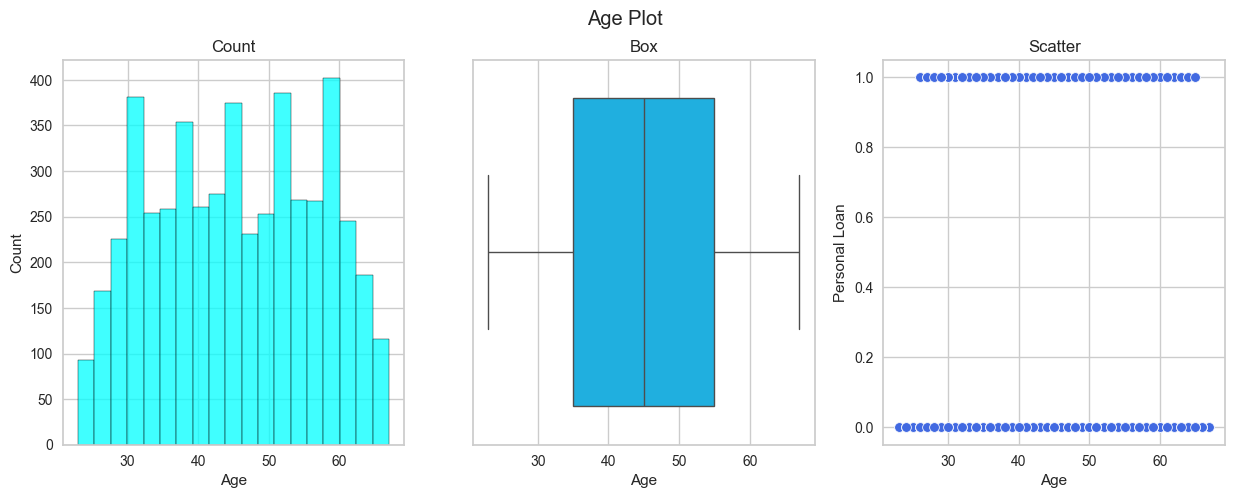

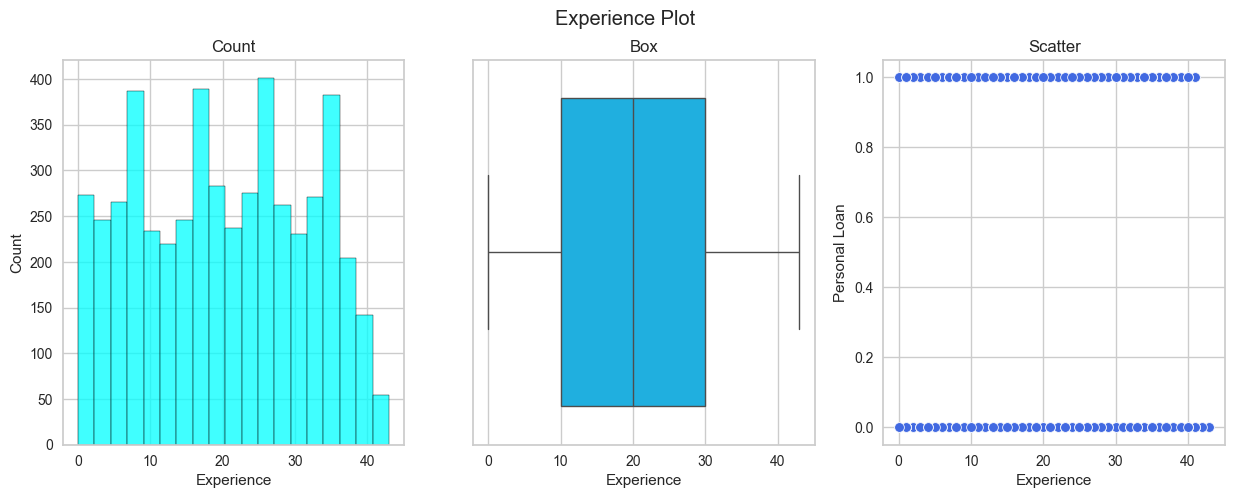

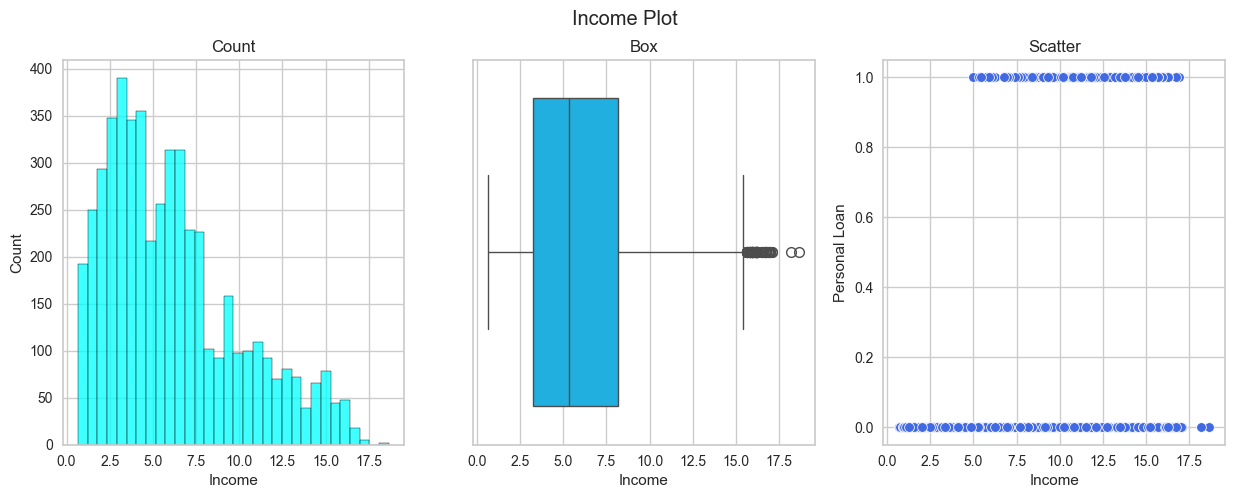

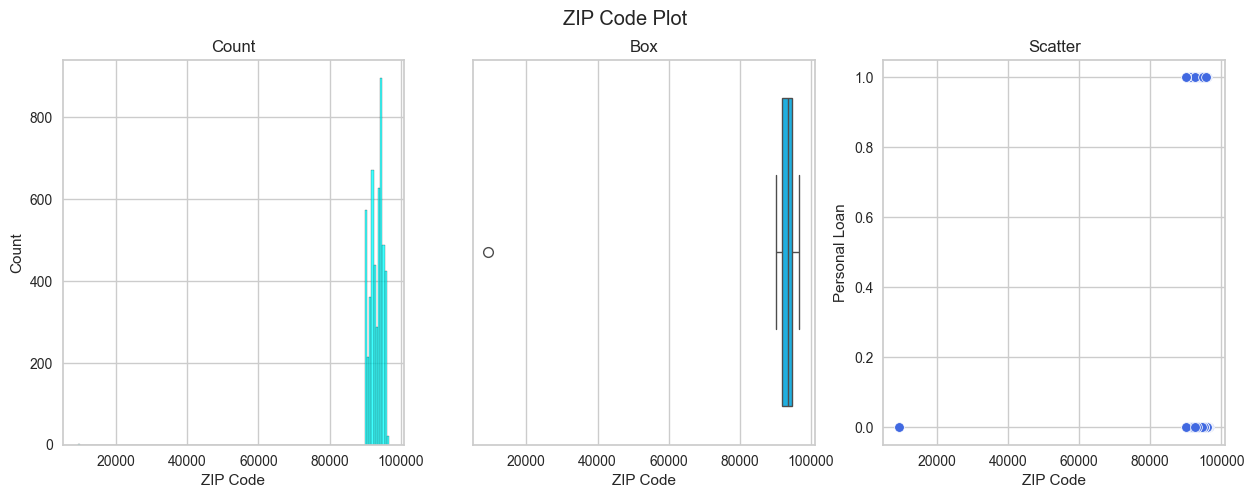

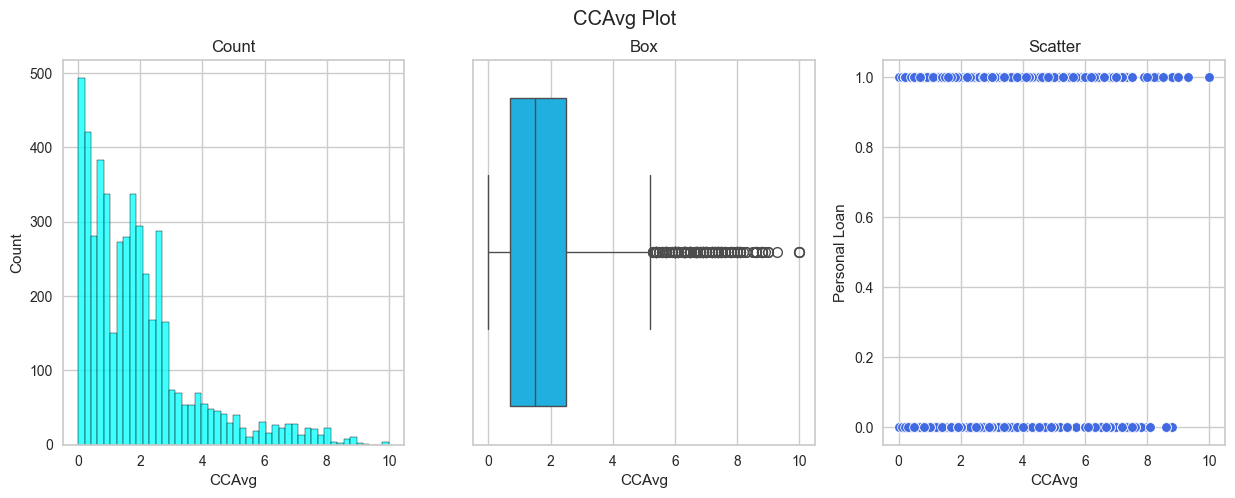

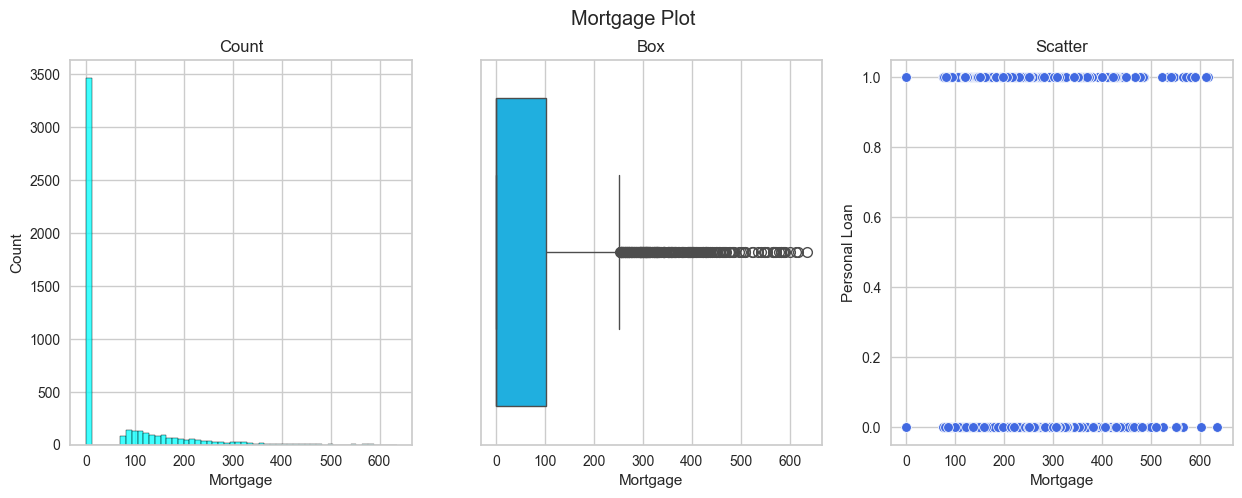

In [22]:
# Suppress warnings about future changes to Python or libraries to avoid cluttering the output
warnings.simplefilter(action='ignore')

for i in numericaldf:
    figure, plots = plt.subplots(1, 3, figsize=(15, 5),) 
    figure.suptitle(i+' Plot')

    # countplot
    sns.histplot(data=df_final, x=i, color='aqua',ec='black',ax=plots[0])
    plots[0].set_title("Count")
    #plots[0].set_xticks(np.arange(0, 50, 5))

    # boxplot
    sns.boxplot(data=df_final, x=i,ax=plots[1],color='DeepSkyBlue')
    plots[1].set_title("Box")


    sns.scatterplot(data=df_final, x=i,y="Personal Loan", ax=plots[2],color='royalblue')
    plots[2].set_title("Scatter")


    figure.show()

In [23]:
categoricdf=df_final.drop(['ID','Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage','postal_code','county_name','county_code','latitude','longitude','place_name'], axis=1)
categoricdf.head(3)

Family  Education  Personal Loan  Securities Account  CD Account  Online  \
0       4          1              0                   1           0       0   
1       3          1              0                   1           0       0   
2       1          1              0                   0           0       0   

   CreditCard  decade  
0           0  twenty  
1           0   forty  
2           0  thirty

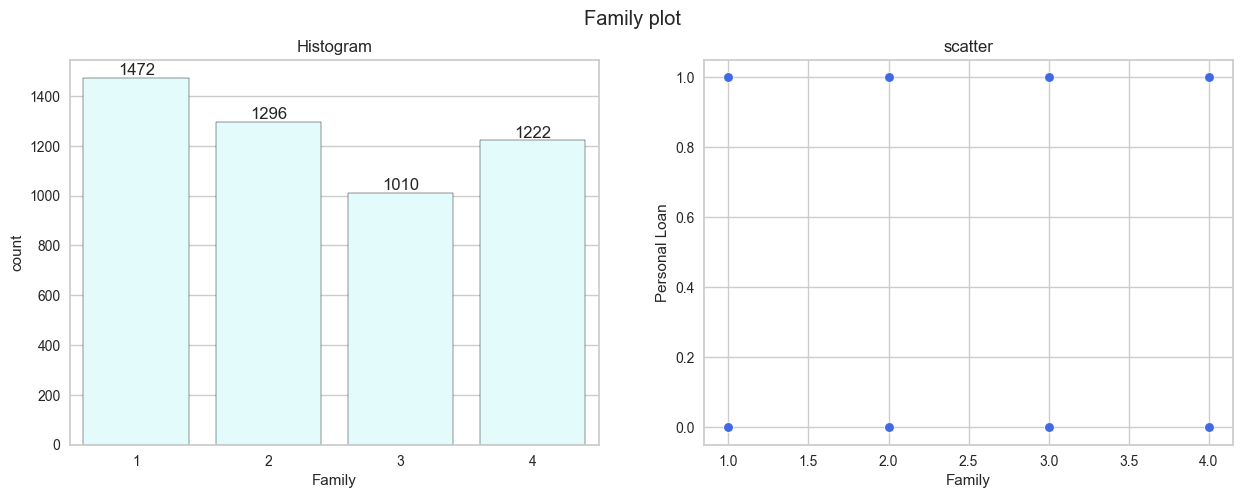

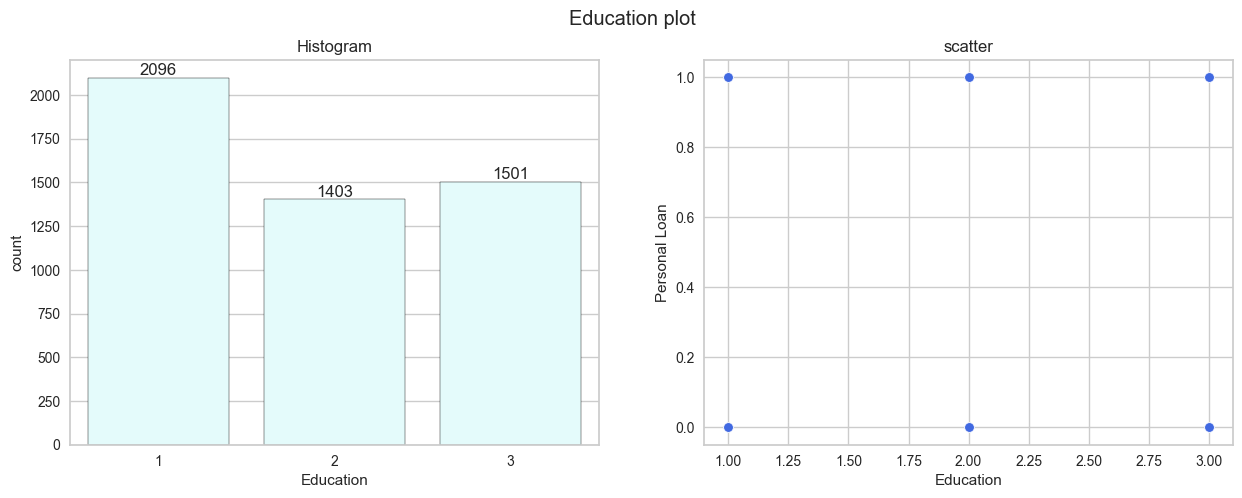

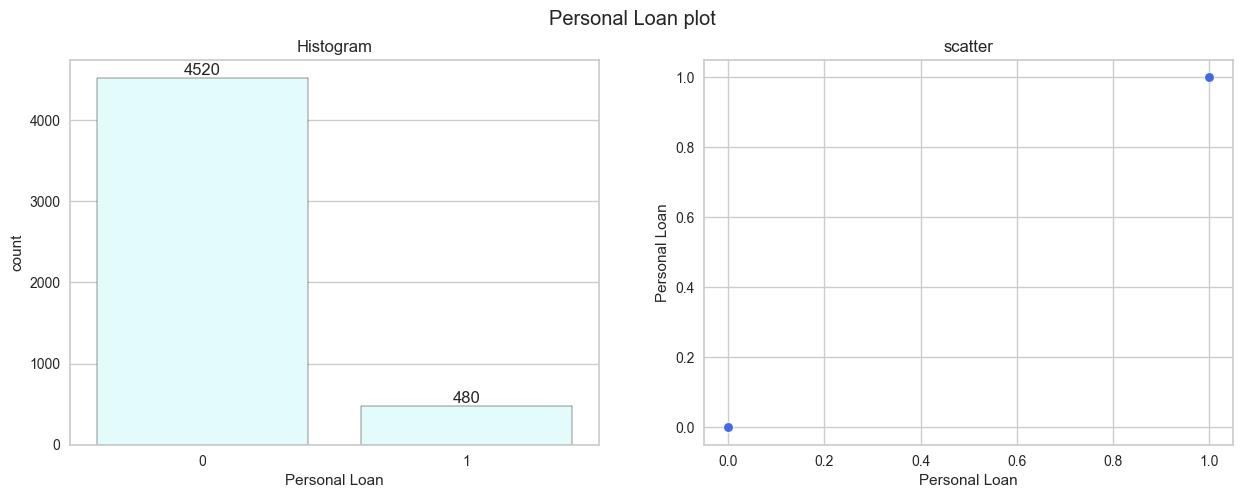

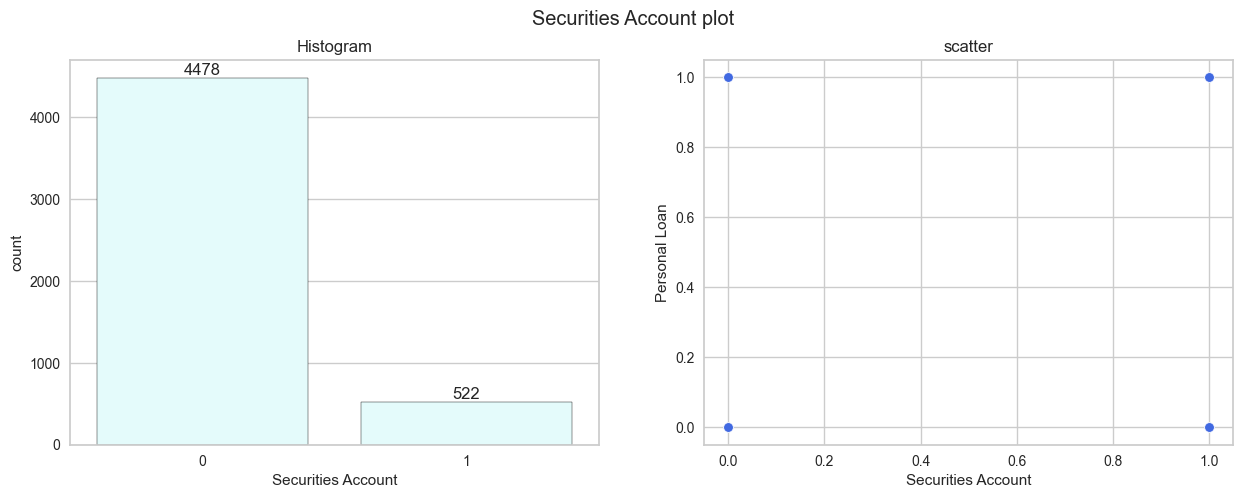

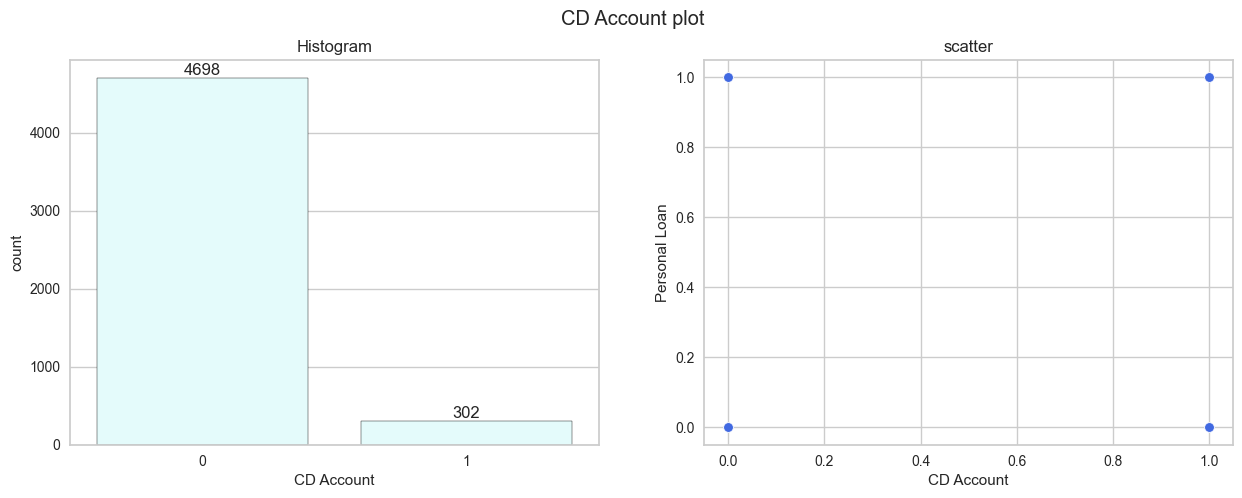

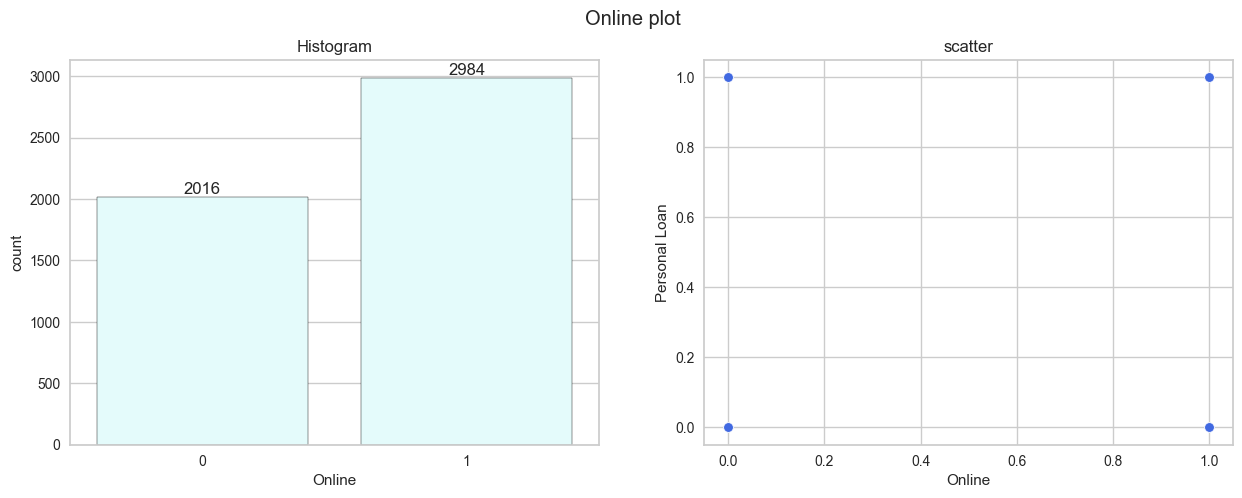

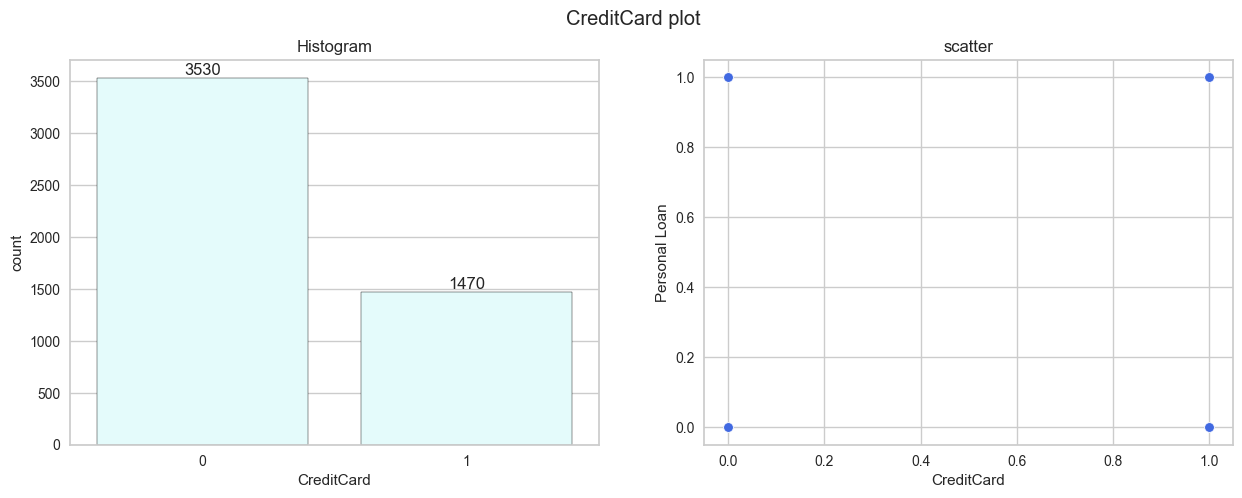

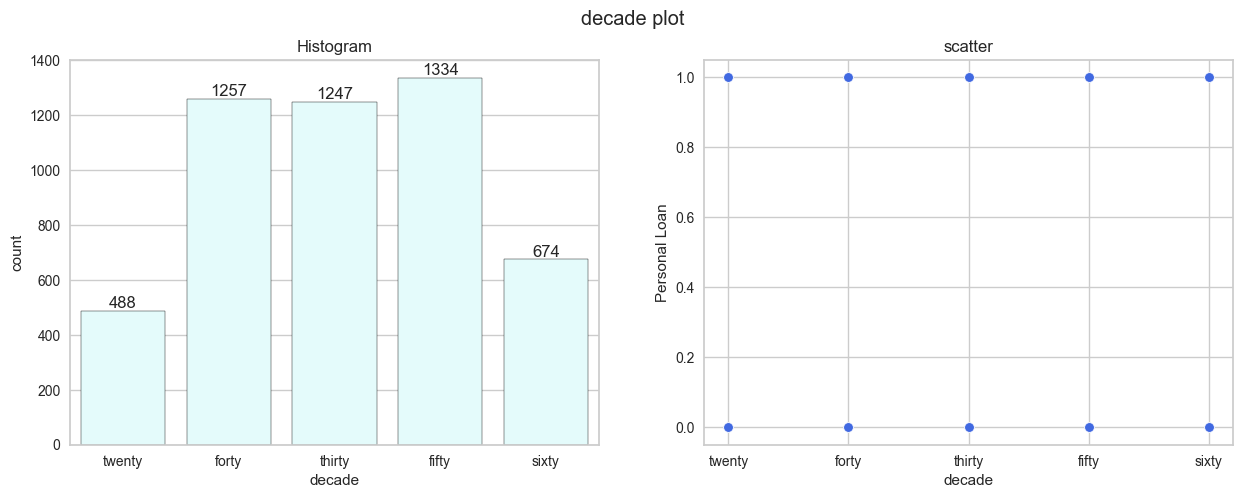

In [24]:
for i in categoricdf:
    figure, plots = plt.subplots(1,2, figsize=(15, 5),) 
    figure.suptitle(i+' plot')

    # histplot
    ax=sns.countplot(data=df_final, x=i, color='lightCyan',ec='black',ax=plots[0])
    plots[0].set_title("Histogram")
    for container in ax.containers:
        ax.bar_label(container)   

    sns.scatterplot(data=df_final, x=i,y="Personal Loan", ax=plots[1],color='royalblue')
    plots[1].set_title("scatter")


    figure.show()

In [25]:
#elimination of noise and missing value

df_final= df_final[df_final["ZIP Code"]>20000] # according to zipcode plot( one zipcode recognised )
df_final=df_final.dropna()  
df_final.head(3)

ID  Age  Experience    Income  ZIP Code  Family  CCAvg  Education  \
0   1   25           1  4.083333     91107       4    1.6          1   
1   2   45          19  2.833333     90089       3    1.5          1   
2   3   39          15  0.916667     94720       1    1.0          1   

   Mortgage  Personal Loan  ...  CD Account  Online  CreditCard  decade  \
0         0              0  ...           0       0           0  twenty   
1         0              0  ...           0       0           0   forty   
2         0              0  ...           0       0           0  thirty   

  postal_code   place_name  county_name county_code  latitude  longitude  
0       91107     Pasadena  Los Angeles        37.0   34.1510  -118.0889  
1       90089  Los Angeles  Los Angeles        37.0   33.7866  -118.2987  
2       94720     Berkeley      Alameda         1.0   37.8738  -122.2549  

[3 rows x 21 columns]

In [26]:
df_final.drop(columns = ['ID'], inplace = True)
df_final = df_final.reset_index(drop=True)
df_final.head(3)

Age  Experience    Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1  4.083333     91107       4    1.6          1         0   
1   45          19  2.833333     90089       3    1.5          1         0   
2   39          15  0.916667     94720       1    1.0          1         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  decade  \
0              0                   1           0       0           0  twenty   
1              0                   1           0       0           0   forty   
2              0                   0           0       0           0  thirty   

  postal_code   place_name  county_name  county_code  latitude  longitude  
0       91107     Pasadena  Los Angeles         37.0   34.1510  -118.0889  
1       90089  Los Angeles  Los Angeles         37.0   33.7866  -118.2987  
2       94720     Berkeley      Alameda          1.0   37.8738  -122.2549

In [62]:
## categorical columns

In [27]:
def Four_part(arr):
    part = (arr.max() - arr.min()) / 4
    output = []
    for value in arr:
        if value <= (arr.min() + part):
            output.append(1)  
        elif value > (arr.min() + part) and value <= (arr.min() + (2*part)):
            output.append(2)  
        elif value > (arr.min() + (2*part)) and value <= (arr.min() + (3*part)):
            output.append(3)  
        elif value > (arr.min() + (3*part)):
            output.append(4)  
    return output

In [28]:
df_parted = df_final.copy()

df_parted['Age'] = Four_part(df_parted['Age'])
df_parted['Experience'] = Four_part(df_parted['Experience'])
df_parted['Income'] = Four_part(df_parted['Income'])
df_parted['CCAvg'] = Four_part(df_parted['CCAvg'])
df_parted['Mortgage'] = Four_part(df_parted['Mortgage'])

df_parted['ZIP Code'] = label_encoder.fit_transform(df_parted['ZIP Code'])
df_parted['place_name'] = label_encoder.fit_transform(df_parted['place_name'])

df_parted.head(3)

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0    1           1       1        82       4      1          1         1   
1    2           2       1        33       3      1          1         1   
2    2           2       1       363       1      1          1         1   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  decade  \
0              0                   1           0       0           0  twenty   
1              0                   1           0       0           0   forty   
2              0                   0           0       0           0  thirty   

  postal_code  place_name  county_name  county_code  latitude  longitude  
0       91107         147  Los Angeles         37.0   34.1510  -118.0889  
1       90089         106  Los Angeles         37.0   33.7866  -118.2987  
2       94720          17      Alameda          1.0   37.8738  -122.2549

In [ ]:
### Exploratory Data Analysis (EDA)

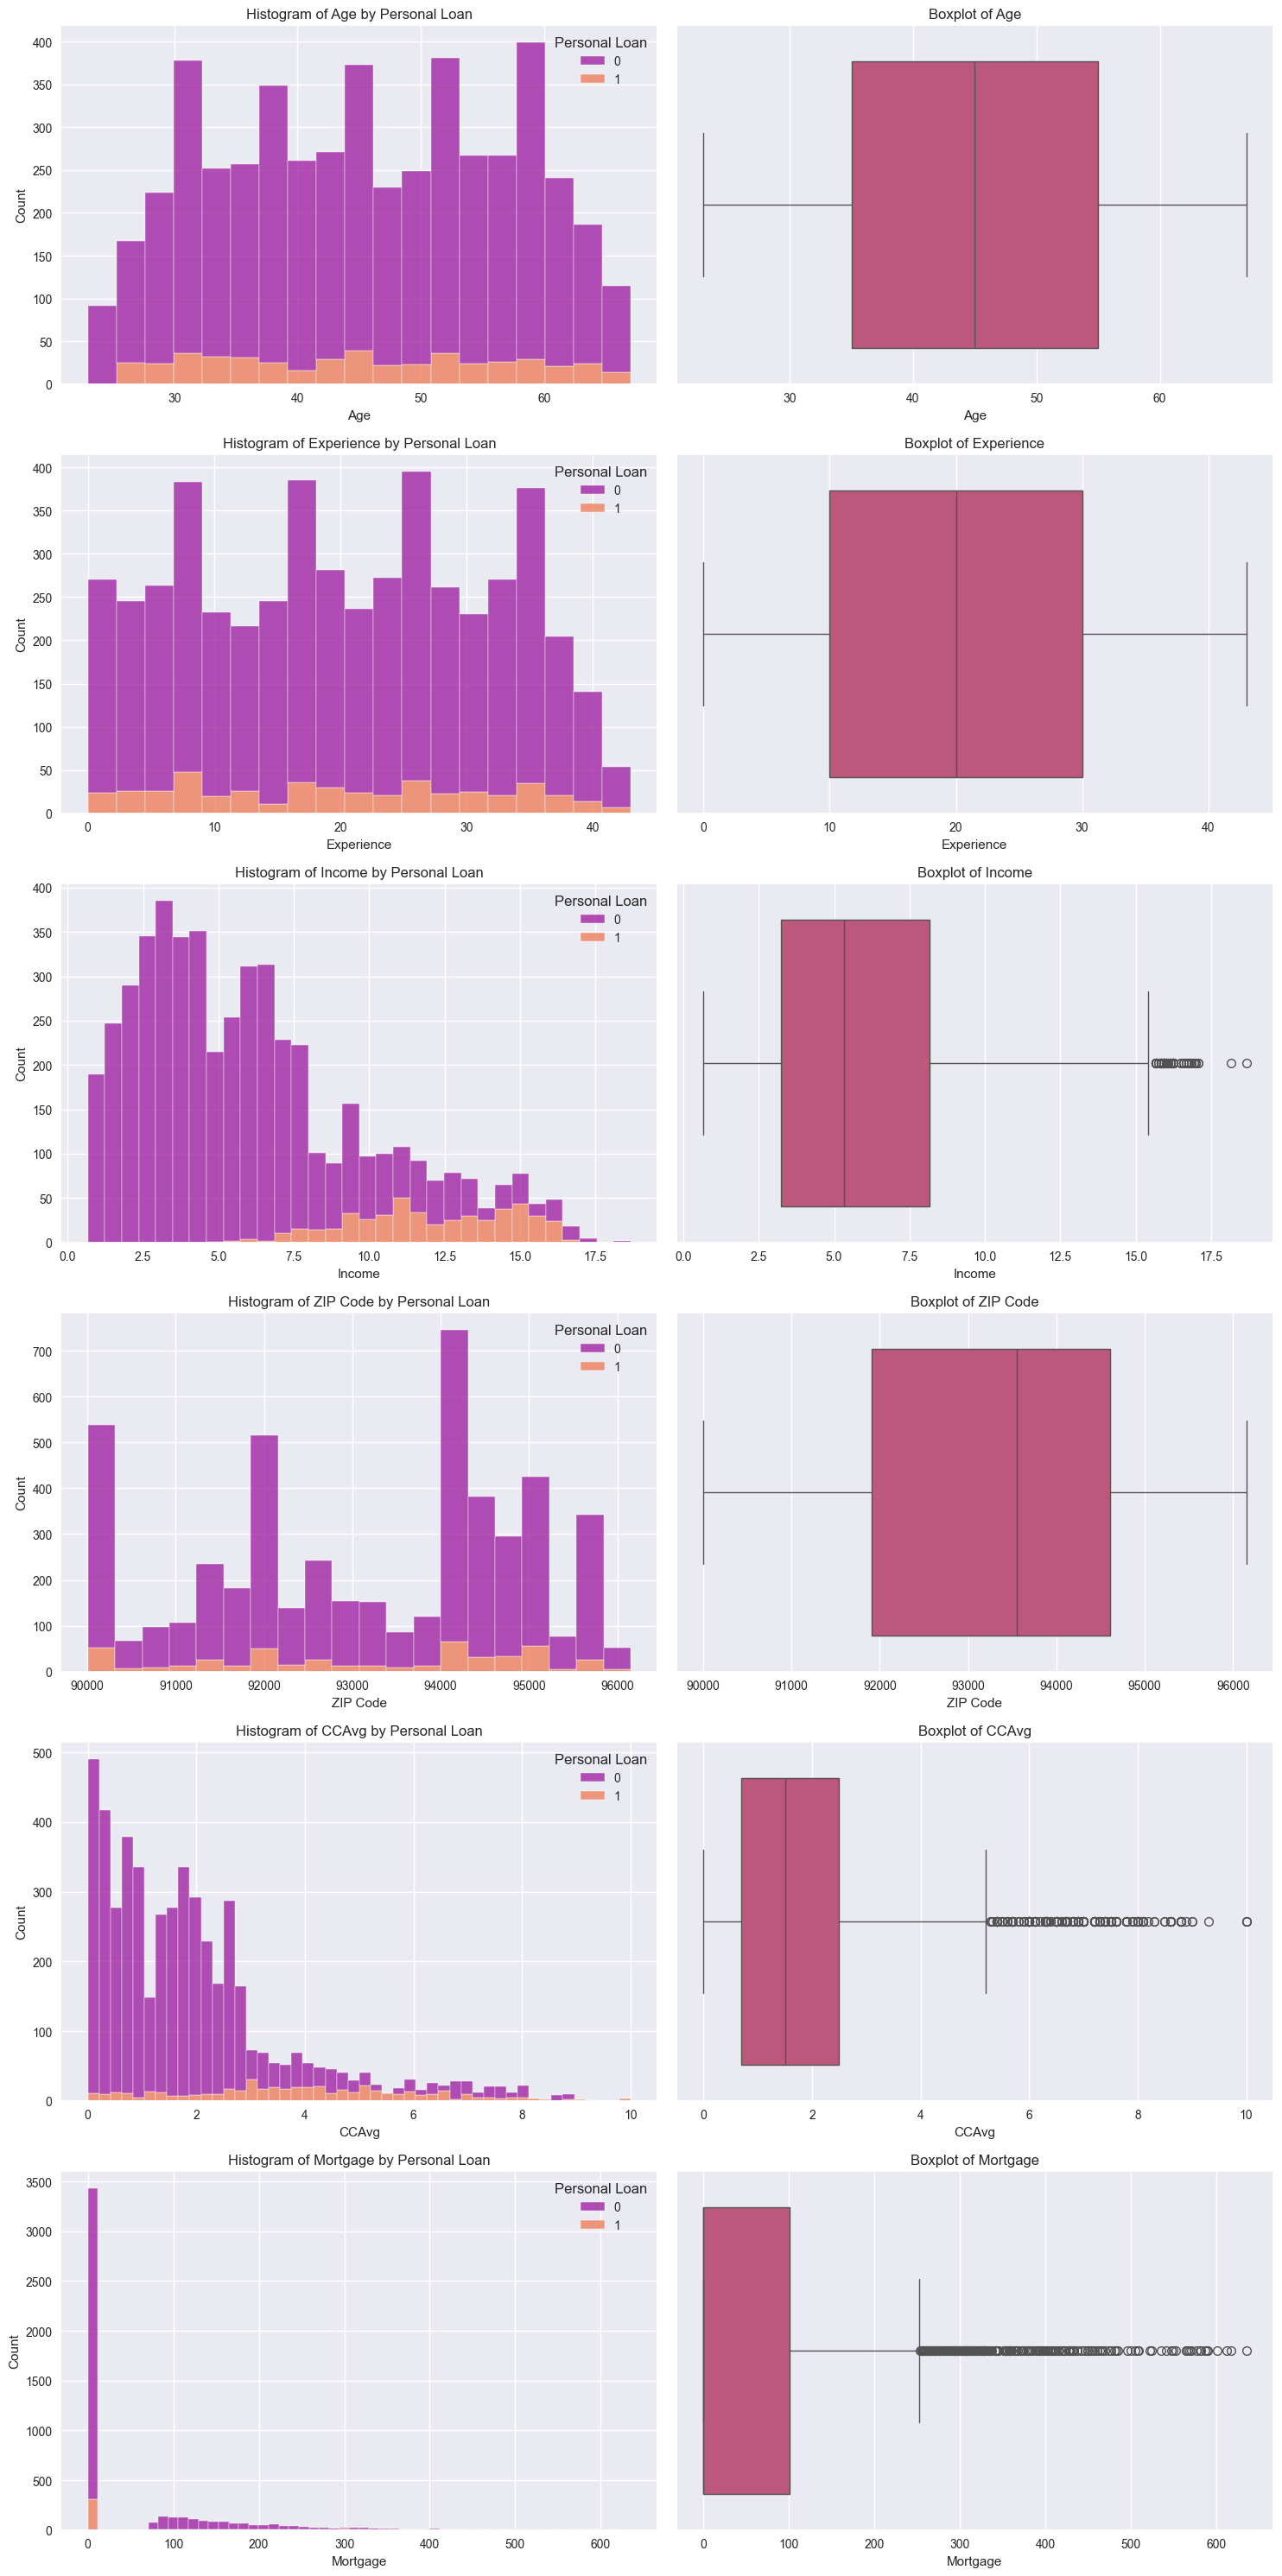

In [29]:
# Suppress warnings about future changes to Python or libraries to avoid cluttering the output
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the visual style of the plots to 'darkgrid' for better readability and aesthetics
sns.set_style('darkgrid')

# Define a list of column names from the dataframe that we want to visualize
list_of_columns = ['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']

# Create a subplot grid with 2 columns and a number of rows equal to the number of columns to visualize
fig, axs = plt.subplots(len(list_of_columns), 2, figsize=(15, 30))

# Loop through each column name, using 'enumerate' to get both the column name and the loop index
for i, columns_name in enumerate(list_of_columns):
    # Plot a histogram for each column, with data segmented by 'Personal Loan' status
    sns.histplot(data=df_final, x=columns_name, hue='Personal Loan',
                 multiple='stack', palette='plasma', ax=axs[i, 0])
    
    # Set the title for each histogram to indicate what data it represents
    axs[i, 0].set_title(f'Histogram of {columns_name} by Personal Loan')
    
    # Plot a boxplot for each column to show the distribution of values
    sns.boxplot(data=df_final, x=columns_name, palette='plasma', ax=axs[i, 1])
    
    # Set the title for each boxplot to indicate what data it represents
    axs[i, 1].set_title(f'Boxplot of {columns_name}')

# Adjust the layout of the subplots to prevent any overlapping of elements
plt.tight_layout()

# Display the plots
plt.show()

# Reset the warning filter to default to ensure that future warnings are not suppressed
warnings.simplefilter(action='default', category=FutureWarning)

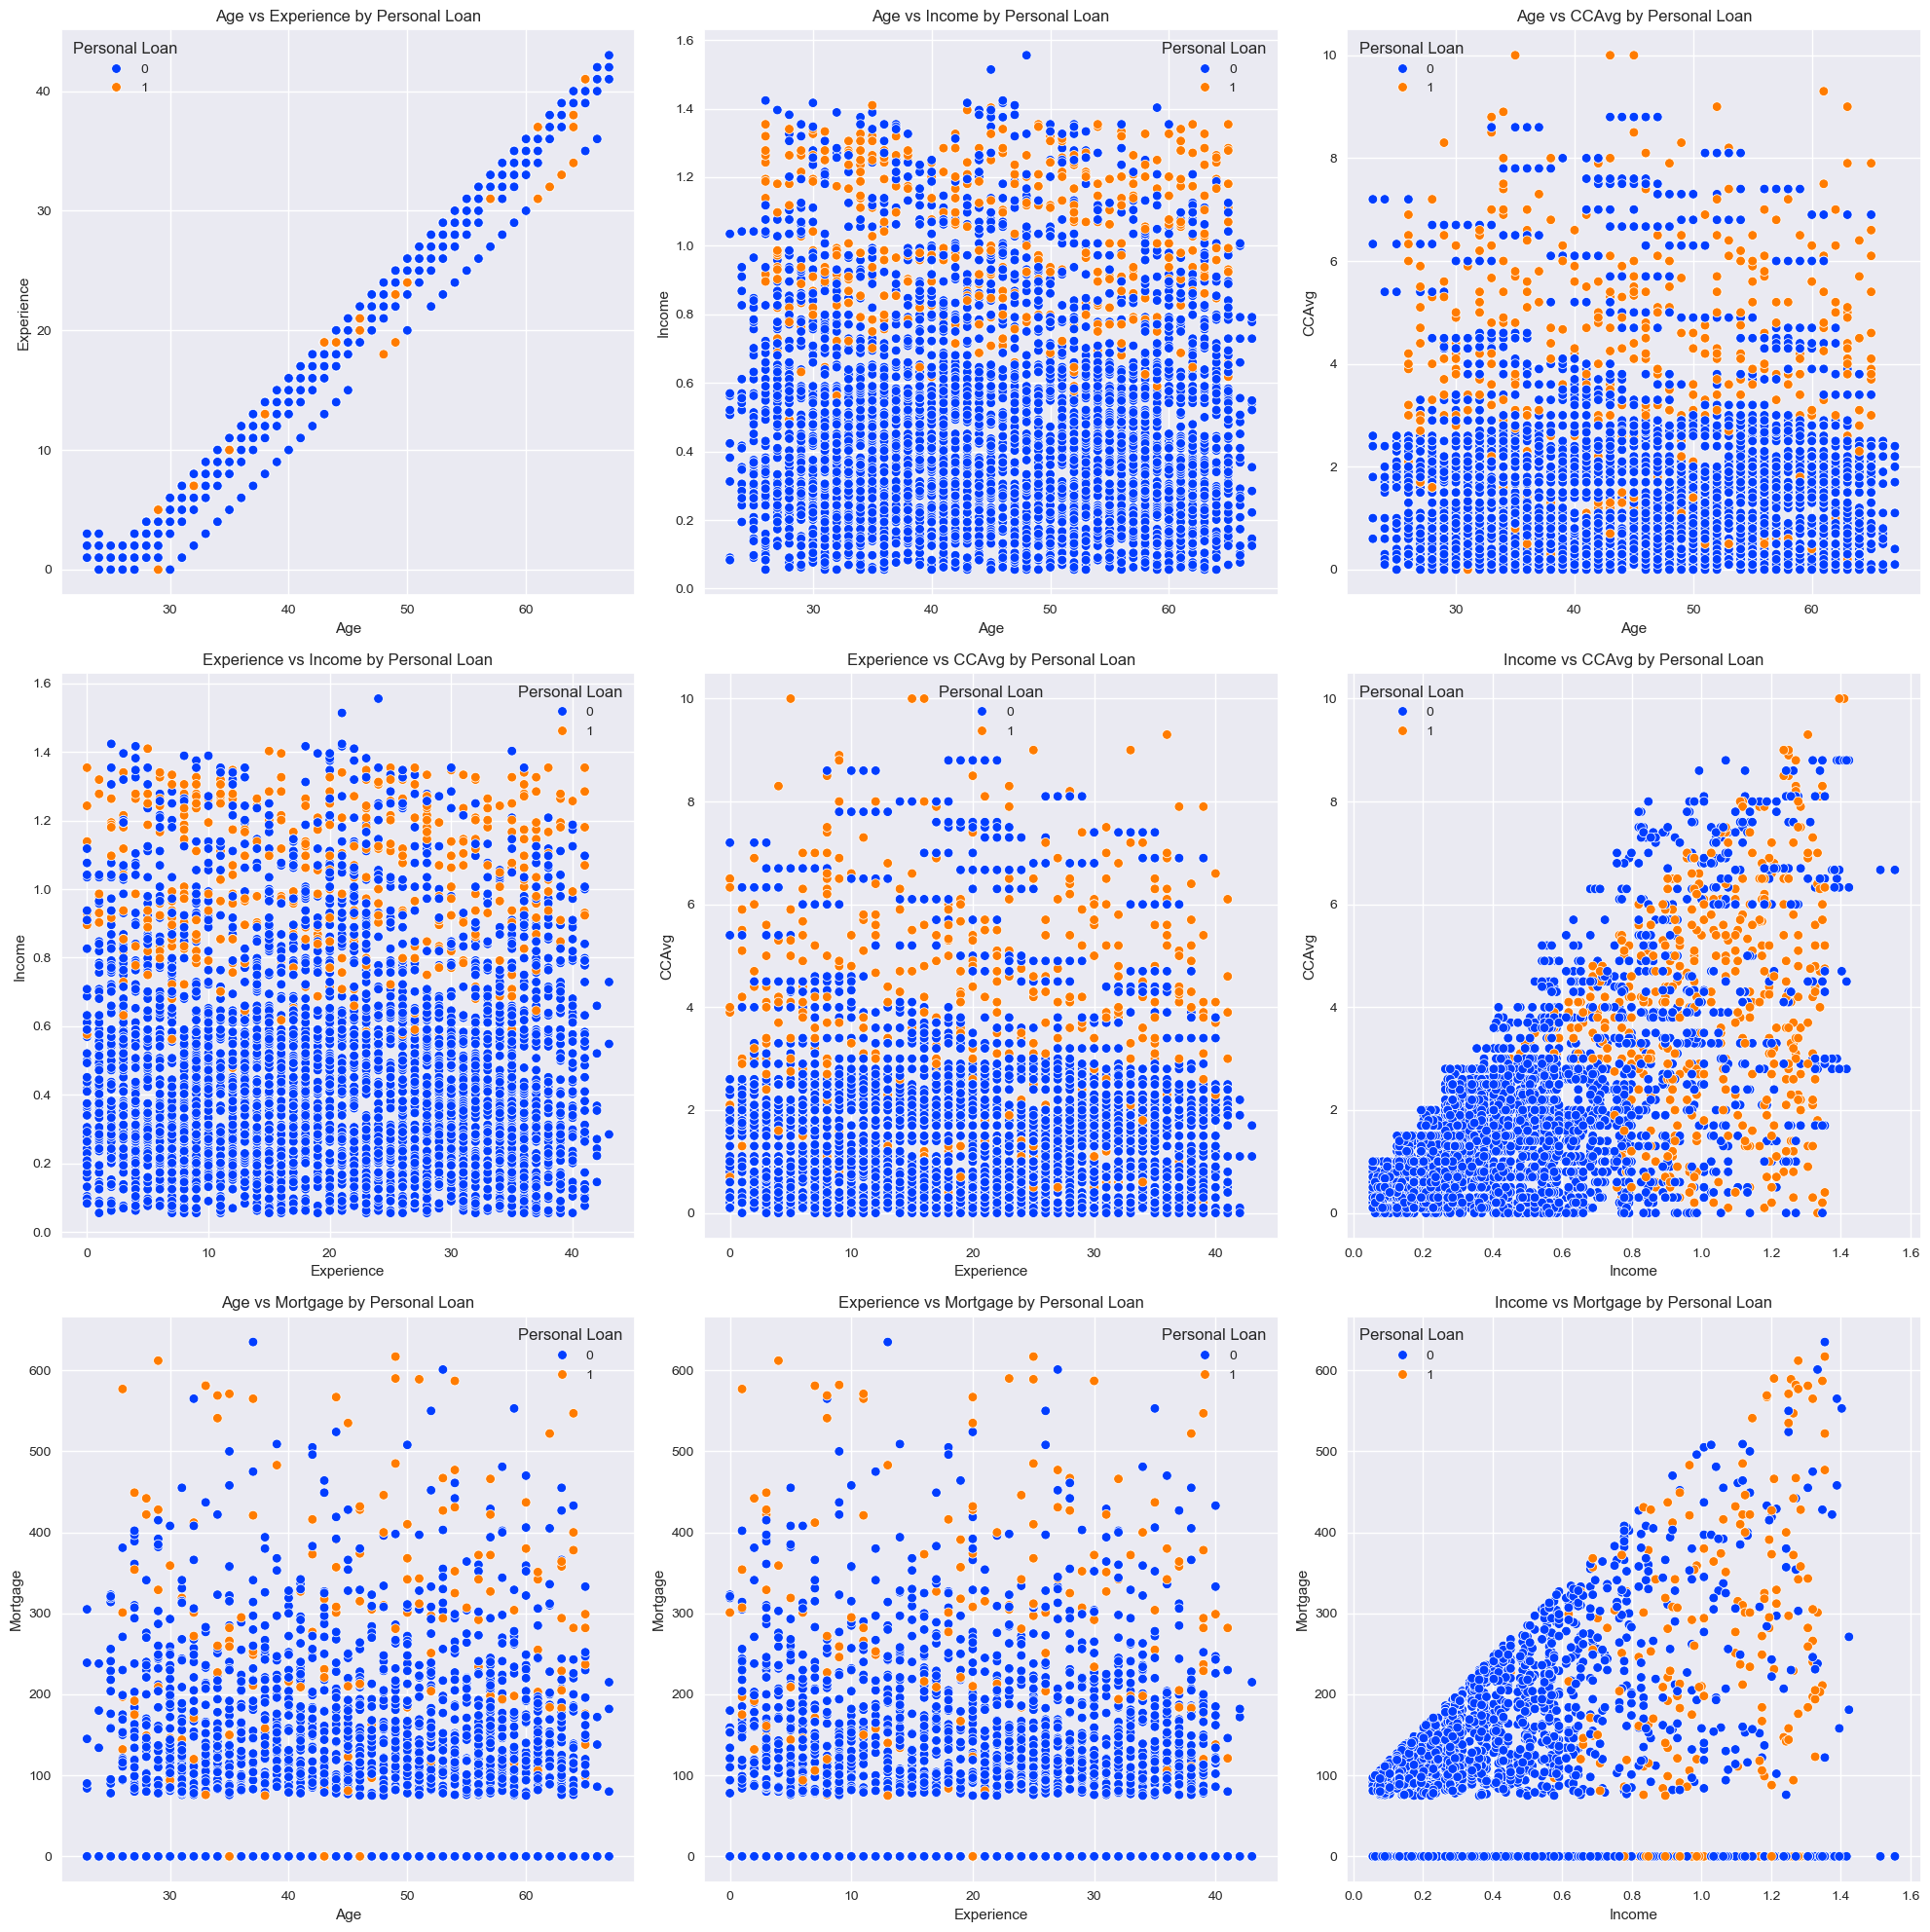

In [148]:
sns.set_style('darkgrid')

# Create a 3x3 subplot grid
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

# Scatter plot with hue set to 'Personal Loan'
sns.scatterplot(x='Age', y='Experience', hue='Personal Loan', data=df_final, ax=axs[0, 0], palette='bright')
axs[0, 0].set_title('Age vs Experience by Personal Loan')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Experience')

sns.scatterplot(x='Age', y='Income', hue='Personal Loan', data=df_final, ax=axs[0, 1], palette='bright')
axs[0, 1].set_title('Age vs Income by Personal Loan')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Income')

sns.scatterplot(x='Age', y='CCAvg', hue='Personal Loan', data=df_final, ax=axs[0, 2], palette='bright')
axs[0, 2].set_title('Age vs CCAvg by Personal Loan')
axs[0, 2].set_xlabel('Age')
axs[0, 2].set_ylabel('CCAvg')

sns.scatterplot(x='Experience', y='Income', hue='Personal Loan', data=df_final, ax=axs[1, 0], palette='bright')
axs[1, 0].set_title('Experience vs Income by Personal Loan')
axs[1, 0].set_xlabel('Experience')
axs[1, 0].set_ylabel('Income')

sns.scatterplot(x='Experience', y='CCAvg', hue='Personal Loan', data=df_final, ax=axs[1, 1], palette='bright')
axs[1, 1].set_title('Experience vs CCAvg by Personal Loan')
axs[1, 1].set_xlabel('Experience')
axs[1, 1].set_ylabel('CCAvg')

sns.scatterplot(x='Income', y='CCAvg', hue='Personal Loan', data=df_final, ax=axs[1, 2], palette='bright')
axs[1, 2].set_title('Income vs CCAvg by Personal Loan')
axs[1, 2].set_xlabel('Income')
axs[1, 2].set_ylabel('CCAvg')

sns.scatterplot(x='Age', y='Mortgage', hue='Personal Loan', data=df_final, ax=axs[2, 0], palette='bright')
axs[2, 0].set_title('Age vs Mortgage by Personal Loan')
axs[2, 0].set_xlabel('Age')
axs[2, 0].set_ylabel('Mortgage')

sns.scatterplot(x='Experience', y='Mortgage', hue='Personal Loan', data=df_final, ax=axs[2, 1], palette='bright')
axs[2, 1].set_title('Experience vs Mortgage by Personal Loan')
axs[2, 1].set_xlabel('Experience')
axs[2, 1].set_ylabel('Mortgage')

sns.scatterplot(x='Income', y='Mortgage', hue='Personal Loan', data=df_final, ax=axs[2, 2], palette='bright')
axs[2, 2].set_title('Income vs Mortgage by Personal Loan')
axs[2, 2].set_xlabel('Income')
axs[2, 2].set_ylabel('Mortgage')

# Adjust layout for a clean look
plt.tight_layout()

# Display the plots
plt.show()

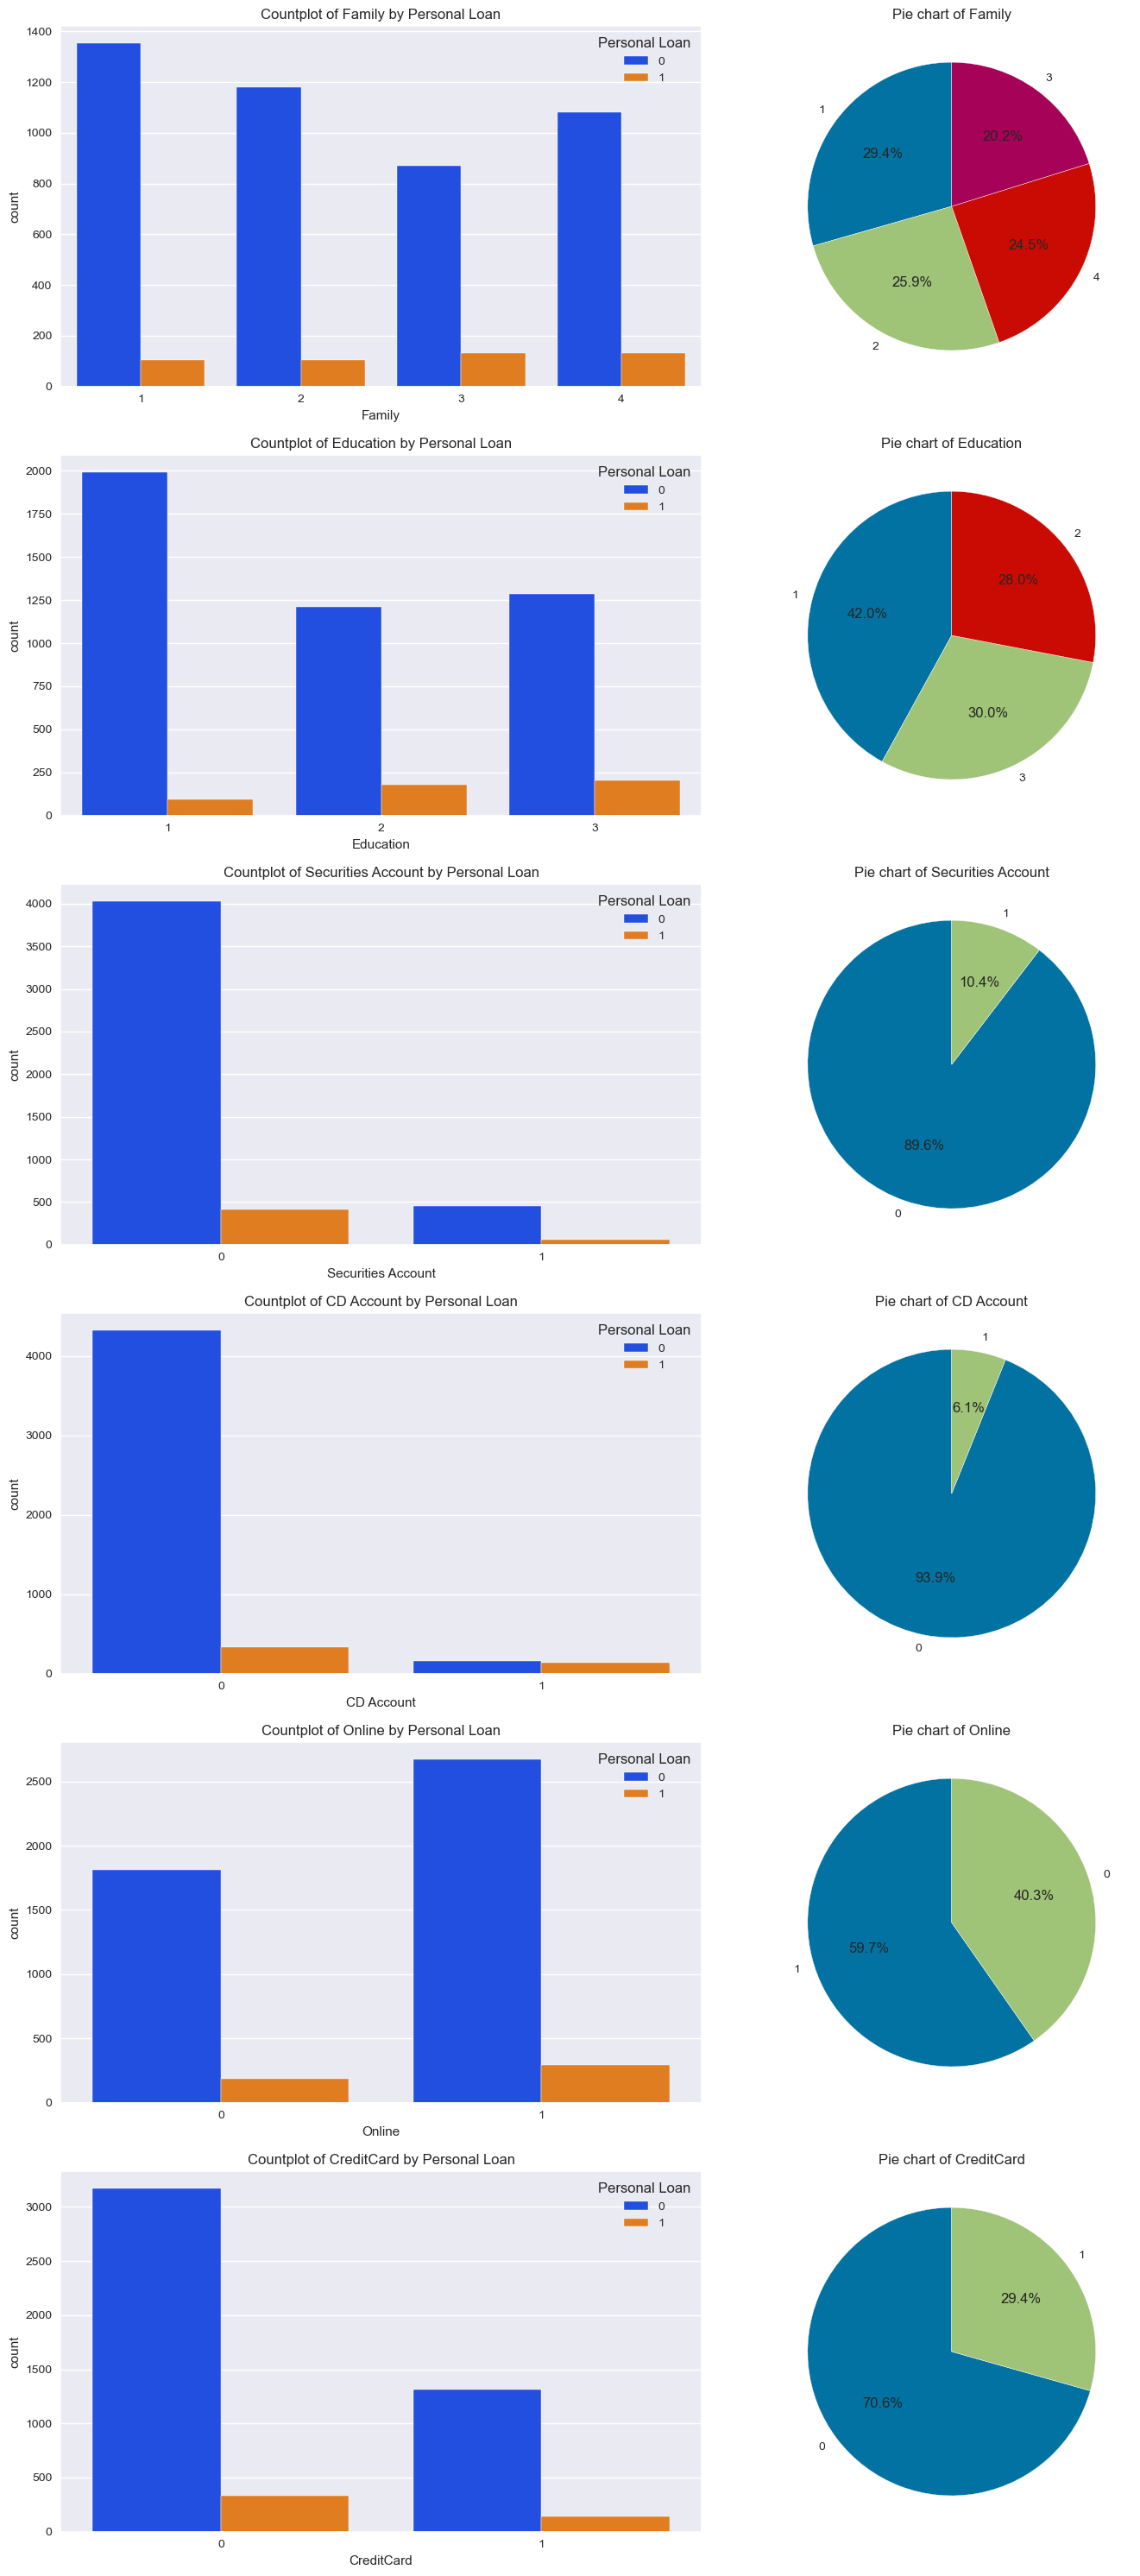

In [152]:
sns.set_style('darkgrid')

list_of_columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

# Create a figure with subplots
fig, axs = plt.subplots(len(list_of_columns), 2, figsize=(15, 30))

for i, column_name in enumerate(list_of_columns):
    # Countplot
    sns.countplot(data=df_final, x=column_name, hue='Personal Loan', palette='bright', ax=axs[i, 0])
    axs[i, 0].set_title(f'Countplot of {column_name} by Personal Loan')
        
    # Pie chart
    column_data = df_final[column_name].value_counts()
    axs[i, 1].pie(column_data, labels=column_data.index, autopct='%1.1f%%', startangle=90)
    axs[i, 1].set_title(f'Pie chart of {column_name}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display all plots
plt.show()

In [158]:
df_visual5=df_final.drop(["decade","place_name","county_name","postal_code","county_code"], axis=1)

<Axes: >

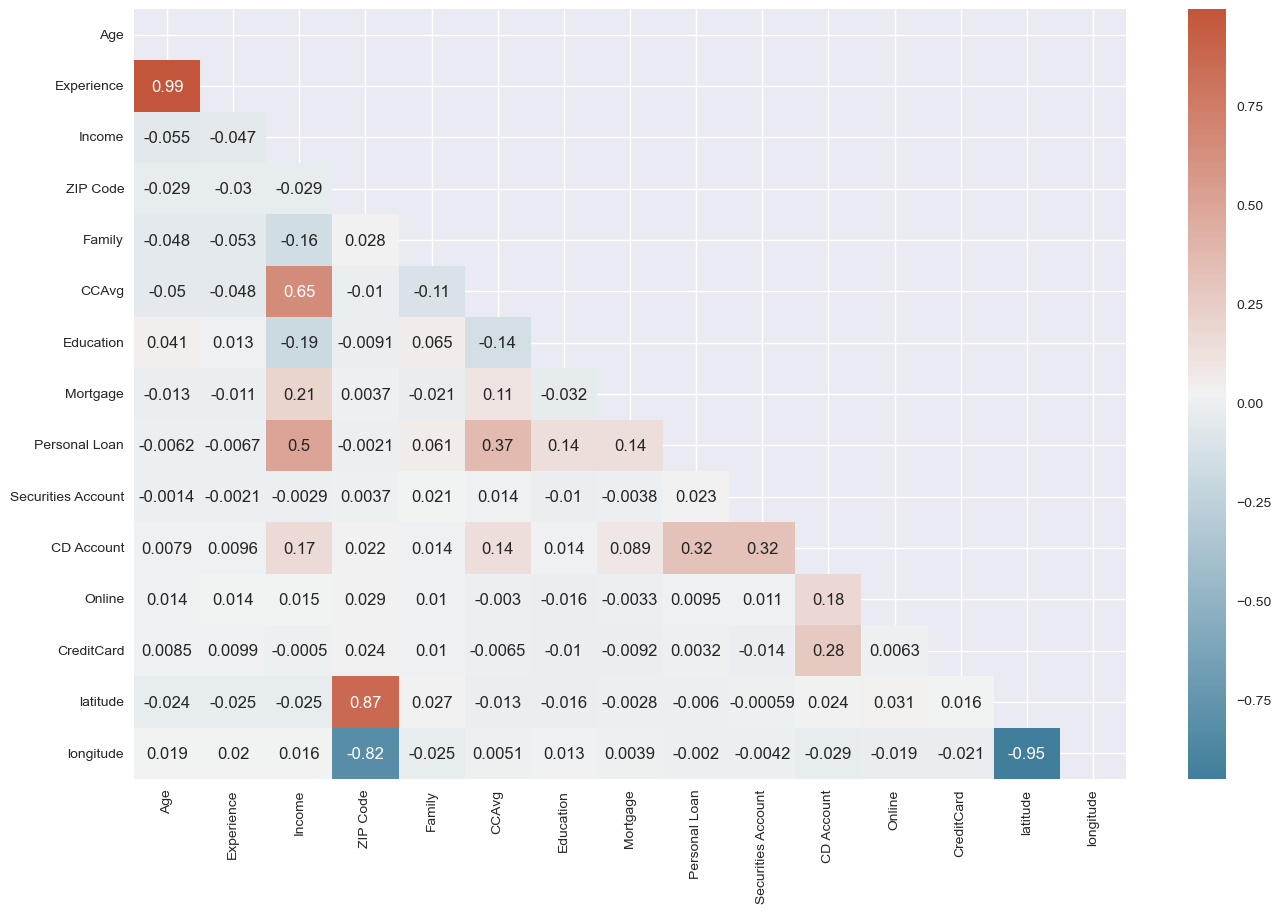

In [160]:
corr = df_visual5.corr()

f, ax = plt.subplots(figsize=(16, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

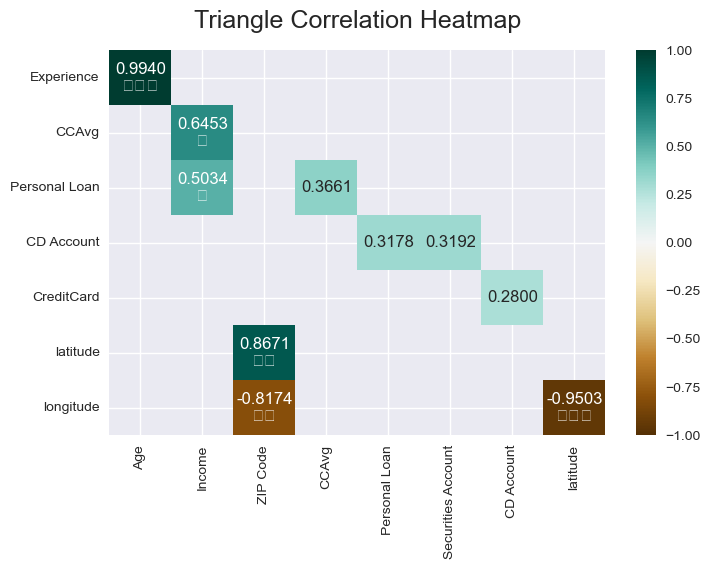

In [170]:
corr = df_visual5.corr()

f, ax = plt.subplots(figsize=(8, 5))

mask = np.triu(np.ones_like(corr, dtype=bool))

cut_off = 0.25  # only show cells with abs(correlation) at least this value
extreme_1 = 0.5  # show with a star
extreme_2 = 0.75  # show with a second star
extreme_3 = 0.9  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.show()

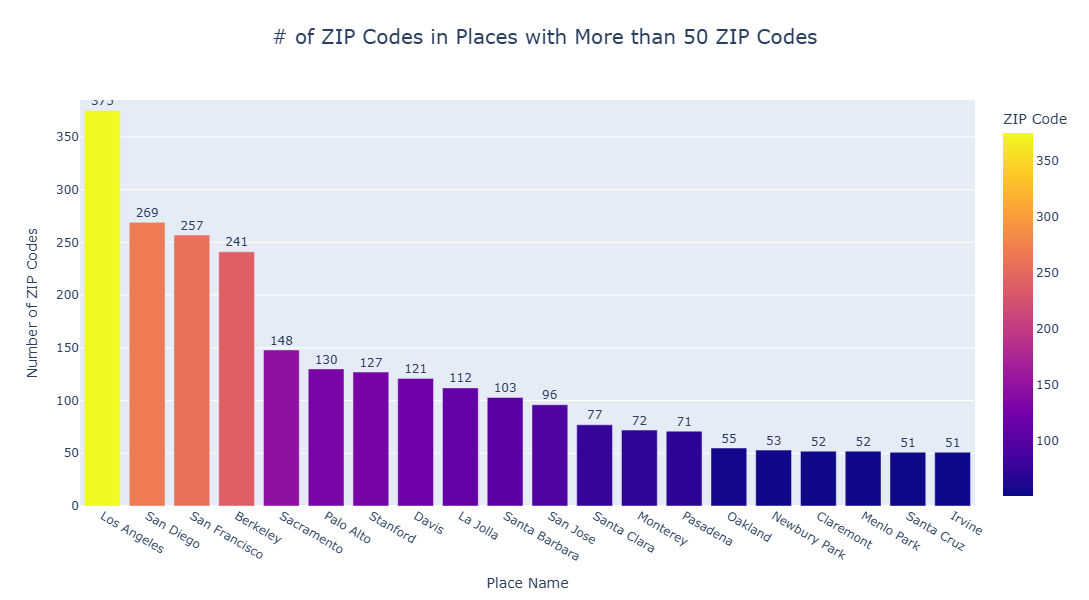

In [162]:
# Group by place_name and calculate required statistics
place_df = df_final.groupby('place_name').agg({'ZIP Code': 'count', 'Income': 'mean', 'CCAvg': 'mean'}).reset_index()

# Sort values by ZIP Code in descending order
place_df = place_df.sort_values(by='ZIP Code', ascending=False)

# Filter places with more than 50 ZIP codes
filtered_place_df = place_df[place_df['ZIP Code'] > 50]

# Create a bar plot
fig = px.bar(filtered_place_df, x="place_name", y="ZIP Code",
             color='ZIP Code', text='ZIP Code',
             hover_data={'Income': ':.2f', 'CCAvg': ':.2f'},
             title="# of ZIP Codes in Places with More than 50 ZIP Codes")

# Update trace settings
fig.update_traces(textposition='outside')

# Update layout for better readability
fig.update_layout(
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    height=600,
    title={
        'text': "# of ZIP Codes in Places with More than 50 ZIP Codes",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    },
    xaxis_title="Place Name",
    yaxis_title="Number of ZIP Codes",
    yaxis=dict(range=[0, filtered_place_df['ZIP Code'].max() + 10])
)

# Show the figure
fig.show()

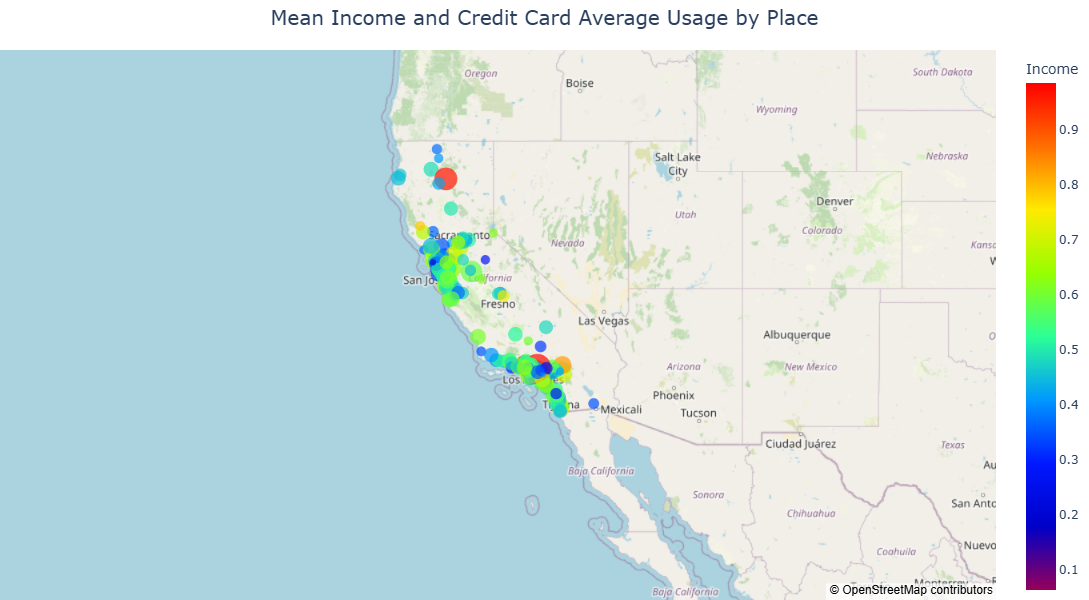

In [166]:
# Calculate the mean income per place_name
mean_income_per_place = df_final.groupby('place_name').agg({
    'Income': 'mean', 
    'CCAvg': 'mean',
    'latitude': 'mean', 
    'longitude': 'mean'
}).reset_index()

# Create the scatter mapbox plot with the size of the dots based on mean income
fig = px.scatter_mapbox(mean_income_per_place, lat="latitude", lon="longitude", hover_name="place_name",
                        hover_data=["Income", 'CCAvg'], color="Income",
                        size='CCAvg', color_continuous_scale="rainbow",
                        zoom=4, height=600)

# Update the layout to use open-street-map style and add a title
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0},
                  title_text="Mean Income and Credit Card Average Usage by Place",
                  title_x=0.5, title_font_size=20)

# Show the figure
fig.show()

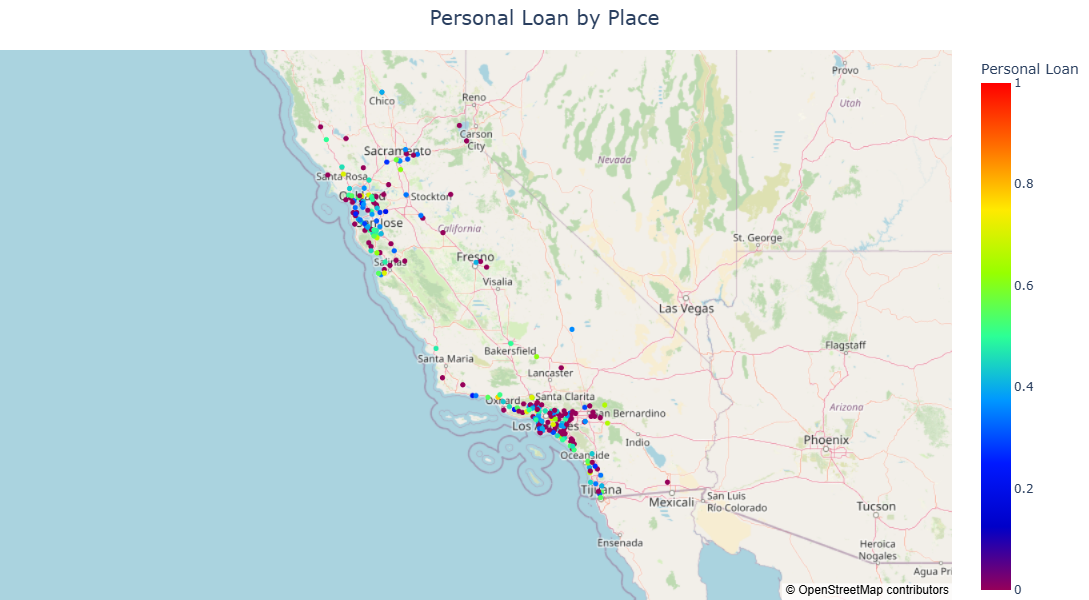

In [168]:
# Calculate the mean Personal Loan per place_name
mean_Personal_Loan_per_place = df_final.groupby('place_name').agg({
    'Personal Loan': 'mean',
    'latitude': 'mean',
    'longitude': 'mean'
}).reset_index()

# Apply a transformation to the mean values of Personal Loan
mean_Personal_Loan_per_place['Personal Loan'] = np.sqrt(mean_Personal_Loan_per_place['Personal Loan'])

# Scale the transformed values to a specified range
scaler = MinMaxScaler(feature_range=(0, 1))
mean_Personal_Loan_per_place['Personal Loan'] = scaler.fit_transform(mean_Personal_Loan_per_place[['Personal Loan']])

# Create the scatter mapbox plot with the size of the dots based on transformed and scaled mean Personal Loan
fig = px.scatter_mapbox(mean_Personal_Loan_per_place, lat="latitude", lon="longitude", hover_name="place_name",
                        hover_data=['Personal Loan'], color="Personal Loan",
                        color_continuous_scale="rainbow",  # Use a continuous color scale
                        zoom=5, height=600, size_max=100)

# Update the layout to use open-street-map style and add a title
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0},
                  title_text="Personal Loan by Place",
                  title_x=0.5, title_font_size=20)

# Show the figure
fig.show()

In [204]:
#df_raw = df_final.copy()
df_final.drop(columns = ['place_name', 'county_name'], inplace = True)
#df_model = df_final.reset_index(drop=True)
df_final.head(3)

Age  Experience    Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1  0.340278     91107       4    1.6          1         0   
1   45          19  0.236111     90089       3    1.5          1         0   
2   39          15  0.076389     94720       1    1.0          1         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   

  postal_code  county_code  latitude  longitude  
0       91107         37.0   34.1510  -118.0889  
1       90089         37.0   33.7866  -118.2987  
2       94720          1.0   37.8738  -122.2549

In [ ]:
### logistic regression

In [172]:
X=pd.DataFrame(df_final, columns=["Age","Experience", "Income", "Family", "CCAvg" ,"Education", "Mortgage", "Securities Account", "CD Account","Online", "CreditCard","latitude","longitude"])
y=df_final["Personal Loan"].values.reshape(-1,1)

In [174]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


logreg=LogisticRegression(solver="liblinear",)
kfold_validation=KFold(10)

results=cross_val_score(logreg , X , y, cv=kfold_validation)
print(results)
print("\n"," Accuracy: ",np.mean(results)*100,"%")

[0.95564516 0.9516129  0.94354839 0.93346774 0.95766129 0.94758065
 0.95564516 0.94556452 0.96169355 0.95151515]

  Accuracy:  95.03934506353862 %


In [208]:
### original database partioned by minmaxscaler

Solver     penalty  C  Accuracy  Precision    Recall  True Negatives  \
0        lbfgs          l2  1  0.942540   0.784615  0.542553             884   
1    newton-cg          l2  1  0.942540   0.784615  0.542553             884   
2         saga          l2  4  0.942540   0.753425  0.585106             880   
3         saga          l2  1  0.942540   0.784615  0.542553             884   
4         saga  elasticnet  1  0.942540   0.776119  0.553191             883   
..         ...         ... ..       ...        ...       ...             ...   
115      lbfgs        None  1  0.939516   0.717949  0.595745             876   
116      lbfgs        None  5  0.939516   0.717949  0.595745             876   
117      lbfgs        None  3  0.939516   0.717949  0.595745             876   
118      lbfgs        None  4  0.939516   0.717949  0.595745             876   
119  liblinear          l2  2  0.938508   0.739130  0.542553             880   

     False Positives  False Negatives  True Positives  
0                 14               43              51  
1                 14               43              51  
2                 18               39              55  
3                 14               43              51  
4                 15               42              52  
..               ...              ...             ...  
115               22               38              56  
116               22               38              56  
117               22               38              56  
118               22               38              56  
119               18               43              51  

[120 rows x 10 columns]


 the best result is for lbfgs Solver , penalty : l2 and C : 1 which has accuracy of : 0.9425403225806451




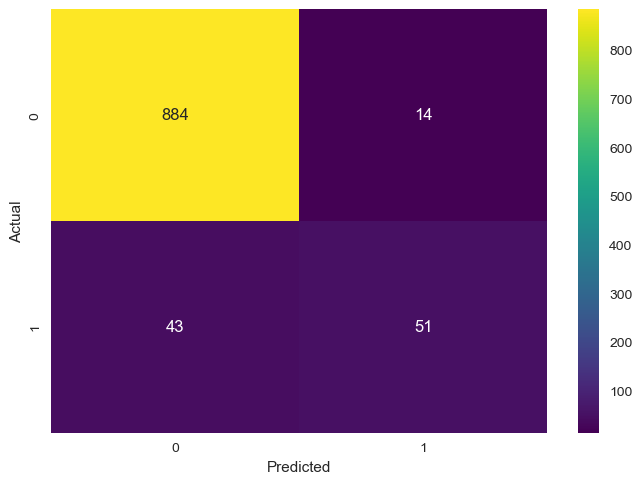

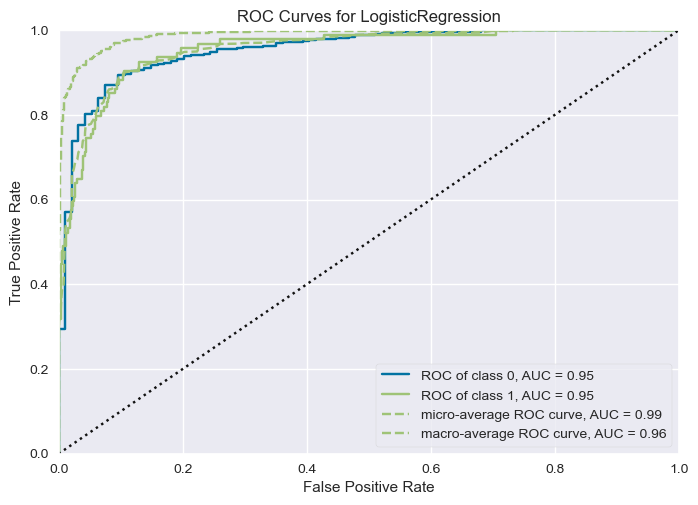

In [206]:
results = []

X = df_final.drop(columns = ['Personal Loan'])
y = df_final['Personal Loan']

Scaler = MinMaxScaler(feature_range = (0, 1))
norm_x = Scaler.fit_transform(X)
X_norm = pd.DataFrame(norm_x, columns=list(X.columns))

x_train1, x_test1, y_train1, y_test1 = train_test_split(X_norm, y, test_size = 0.2, random_state = 0)

solver_penalties = [
    ('lbfgs', ['l2', None]),
    ('liblinear', ['l1', 'l2']),
    ('newton-cg', ['l2', None]),
    ('sag', ['l2', None]),
    ('saga', ['elasticnet', 'l1', 'l2', None])
]

for solver, penalties in solver_penalties:
    for C in np.arange(1,11):
        
        for penalty in penalties:
            if penalty == 'elasticnet':
                l1_ratio = 0.5
                clf = LogisticRegression(solver=solver, C=C, random_state=0,
                                         penalty=penalty, l1_ratio=l1_ratio, max_iter=10000)
            elif penalty is None:
                clf = LogisticRegression(solver=solver, random_state=0, max_iter=10000, penalty= None)
            else:
                clf = LogisticRegression(solver=solver, C=C, random_state=0, penalty=penalty, max_iter=10000)
            clf.fit(x_train1, y_train1)
            y_pred1 = clf.predict(x_test1)
            cm = metrics.confusion_matrix(y_test1, y_pred1)
            accuracy = metrics.accuracy_score(y_test1, y_pred1)
            precision = metrics.precision_score(y_test1, y_pred1)
            recall = metrics.recall_score(y_test1, y_pred1)
            results.append((solver, penalty, C, accuracy, precision, recall, cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]))


results_df = pd.DataFrame(results, columns=['Solver', 'penalty', 'C', 'Accuracy', 'Precision', 'Recall', 'True Negatives',
                                            'False Positives', 'False Negatives', 'True Positives'])

results_df.sort_values(by = 'Accuracy', ascending=False, inplace =True)
results_df.reset_index(drop = True, inplace =True)
display(results_df)

print(f'\n the best result is for {results_df["Solver"][0]} Solver , penalty : {results_df["penalty"][0]} and C : {results_df["C"][0]} which has accuracy of :', results_df['Accuracy'][0])
print('\n')

sns.heatmap([[results_df['True Negatives'][0], results_df['False Positives'][0]],
             [results_df['False Negatives'][0], results_df['True Positives'][0]]], annot=True, fmt='d', cmap='viridis')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

best_solver = results_df["Solver"][0]
best_clf = LogisticRegression(solver=best_solver, max_iter=1000, C=10, random_state=0)
best_clf.fit(x_train1, y_train1)
y_pred_best = best_clf.predict(x_test1)

visualizer = ROCAUC(best_clf)
visualizer.fit(x_train1, y_train1)
visualizer.score(x_test1, y_test1)
visualizer.show();

In [ ]:
### original database partioned by scaler

Solver penalty   C  Accuracy  Precision    Recall  True Negatives  \
0        lbfgs      l2   1  0.941532   0.743243  0.585106             879   
1    liblinear      l1   6  0.941532   0.743243  0.585106             879   
2    liblinear      l1   8  0.941532   0.743243  0.585106             879   
3    liblinear      l1   9  0.941532   0.743243  0.585106             879   
4    liblinear      l1  10  0.941532   0.743243  0.585106             879   
..         ...     ...  ..       ...        ...       ...             ...   
115        sag    None   2  0.940524   0.733333  0.585106             878   
116        sag    None   1  0.940524   0.733333  0.585106             878   
117      lbfgs    None   1  0.940524   0.733333  0.585106             878   
118  newton-cg    None  10  0.940524   0.733333  0.585106             878   
119       saga    None  10  0.940524   0.733333  0.585106             878   

     False Positives  False Negatives  True Positives  
0                 19               39              55  
1                 19               39              55  
2                 19               39              55  
3                 19               39              55  
4                 19               39              55  
..               ...              ...             ...  
115               20               39              55  
116               20               39              55  
117               20               39              55  
118               20               39              55  
119               20               39              55  

[120 rows x 10 columns]


 the best result is for lbfgs Solver , penalty : l2 and C : 1 which has accuracy of : 0.9415322580645161




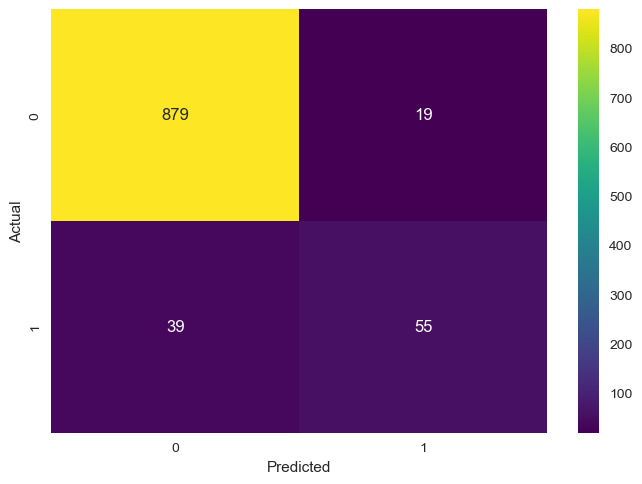

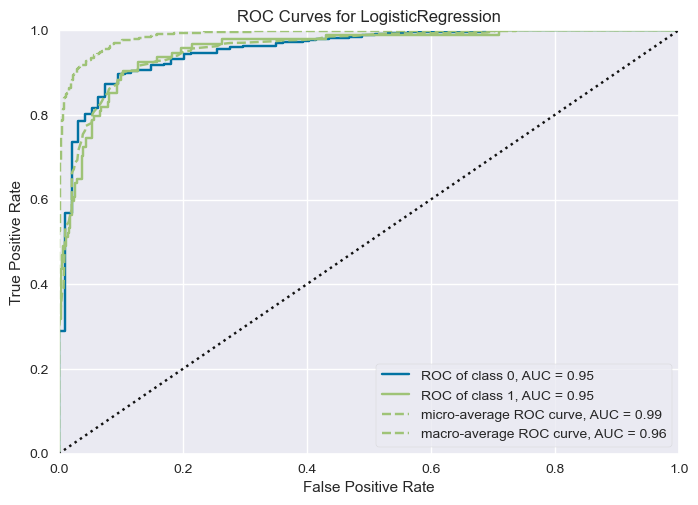

In [212]:
results = []

X = df_final.drop(columns = ['Personal Loan'])
y = df_final['Personal Loan']

scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_x, columns=list(X.columns))

x_train2, x_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

solver_penalties = [
    ('lbfgs', ['l2', None]),
    ('liblinear', ['l1', 'l2']),
    ('newton-cg', ['l2', None]),
    ('sag', ['l2', None]),
    ('saga', ['elasticnet', 'l1', 'l2', None])
]

for solver, penalties in solver_penalties:
    for C in np.arange(1,11):
        
        for penalty in penalties:
            if penalty == 'elasticnet':
                l1_ratio = 0.5
                clf = LogisticRegression(solver=solver, C=C, random_state=0,
                                         penalty=penalty, l1_ratio=l1_ratio, max_iter=10000)
            elif penalty is None:
                clf = LogisticRegression(solver=solver, random_state=0, max_iter=10000, penalty= None)
            else:
                clf = LogisticRegression(solver=solver, C=C, random_state=0, penalty=penalty, max_iter=10000)
            clf.fit(x_train2, y_train2)
            y_pred2 = clf.predict(x_test2)
            cm = metrics.confusion_matrix(y_test2, y_pred2)
            accuracy = metrics.accuracy_score(y_test2, y_pred2)
            precision = metrics.precision_score(y_test2, y_pred2)
            recall = metrics.recall_score(y_test2, y_pred2)
            results.append((solver, penalty, C, accuracy, precision, recall, cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]))


results_df = pd.DataFrame(results, columns=['Solver', 'penalty', 'C', 'Accuracy', 'Precision', 'Recall', 'True Negatives',
                                            'False Positives', 'False Negatives', 'True Positives'])

results_df.sort_values(by = 'Accuracy', ascending=False, inplace =True)
results_df.reset_index(drop = True, inplace =True)
display(results_df)

print(f'\n the best result is for {results_df["Solver"][0]} Solver , penalty : {results_df["penalty"][0]} and C : {results_df["C"][0]} which has accuracy of :', results_df['Accuracy'][0])
print('\n')

sns.heatmap([[results_df['True Negatives'][0], results_df['False Positives'][0]],
             [results_df['False Negatives'][0], results_df['True Positives'][0]]], annot=True, fmt='d', cmap='viridis')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

best_solver = results_df["Solver"][0]
best_clf = LogisticRegression(solver=best_solver, max_iter=1000, C=10, random_state=0)
best_clf.fit(x_train2, y_train2)
y_pred_best = best_clf.predict(x_test2)

visualizer = ROCAUC(best_clf)
visualizer.fit(x_train2, y_train2)
visualizer.score(x_test2, y_test2)
visualizer.show();

In [224]:
### nice thing to knwow about drop colum

# axis=1 means you're dropping columns (not rows).
# You can also do it in-place without creating a new DataFrame by adding inplace=True:

In [228]:
df_parte_raw = df_parted.copy()
df_parted.drop(['decade', 'county_name'], axis=1, inplace=True)
df_parted.head(3)

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0    1           1       1        82       4      1          1         1   
1    2           2       1        33       3      1          1         1   
2    2           2       1       363       1      1          1         1   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   

  postal_code  place_name  county_code  latitude  longitude  
0       91107         147         37.0   34.1510  -118.0889  
1       90089         106         37.0   33.7866  -118.2987  
2       94720          17          1.0   37.8738  -122.2549

In [214]:
### using parted database and minmax scaler

Solver     penalty   C  Accuracy  Precision    Recall  True Negatives  \
0         saga  elasticnet   8  0.942540   0.746667  0.595745             879   
1          sag          l2  10  0.942540   0.746667  0.595745             879   
2         saga  elasticnet   7  0.942540   0.746667  0.595745             879   
3         saga  elasticnet   9  0.942540   0.746667  0.595745             879   
4    newton-cg          l2  10  0.942540   0.746667  0.595745             879   
..         ...         ...  ..       ...        ...       ...             ...   
115  liblinear          l2   3  0.939516   0.729730  0.574468             878   
116  liblinear          l2   2  0.939516   0.729730  0.574468             878   
117  liblinear          l1   1  0.939516   0.723684  0.585106             877   
118        sag          l2   1  0.939516   0.736111  0.563830             879   
119  liblinear          l2   1  0.937500   0.722222  0.553191             878   

     False Positives  False Negatives  True Positives  
0                 19               38              56  
1                 19               38              56  
2                 19               38              56  
3                 19               38              56  
4                 19               38              56  
..               ...              ...             ...  
115               20               40              54  
116               20               40              54  
117               21               39              55  
118               19               41              53  
119               20               42              52  

[120 rows x 10 columns]


 the best result is for saga Solver , penalty : elasticnet and C : 8 which has accuracy of : 0.9425403225806451




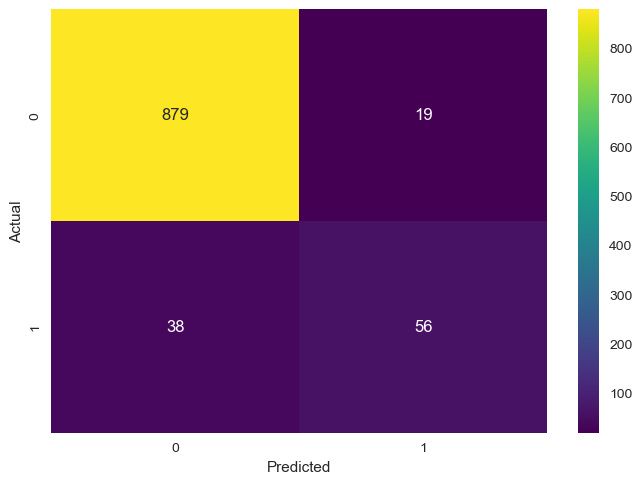

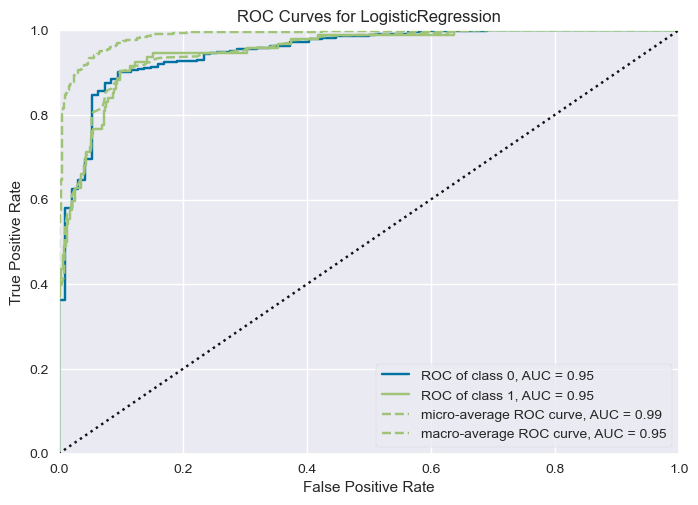

In [230]:
results = []

X = df_parted.drop(columns = ['Personal Loan'])
y = df_parted['Personal Loan']

Scaler = MinMaxScaler(feature_range = (0, 1))
norm_x = Scaler.fit_transform(X)
X_norm = pd.DataFrame(norm_x, columns=list(X.columns))

x_train1, x_test1, y_train1, y_test1 = train_test_split(X_norm, y, test_size = 0.2, random_state = 0)

solver_penalties = [
    ('lbfgs', ['l2', None]),
    ('liblinear', ['l1', 'l2']),
    ('newton-cg', ['l2', None]),
    ('sag', ['l2', None]),
    ('saga', ['elasticnet', 'l1', 'l2', None])
]

for solver, penalties in solver_penalties:
    for C in np.arange(1,11):
        
        for penalty in penalties:
            if penalty == 'elasticnet':
                l1_ratio = 0.5
                clf = LogisticRegression(solver=solver, C=C, random_state=0,
                                         penalty=penalty, l1_ratio=l1_ratio, max_iter=10000)
            elif penalty is None:
                clf = LogisticRegression(solver=solver, random_state=0, max_iter=10000, penalty= None)
            else:
                clf = LogisticRegression(solver=solver, C=C, random_state=0, penalty=penalty, max_iter=10000)
            clf.fit(x_train1, y_train1)
            y_pred1 = clf.predict(x_test1)
            cm = metrics.confusion_matrix(y_test1, y_pred1)
            accuracy = metrics.accuracy_score(y_test1, y_pred1)
            precision = metrics.precision_score(y_test1, y_pred1)
            recall = metrics.recall_score(y_test1, y_pred1)
            results.append((solver, penalty, C, accuracy, precision, recall, cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]))


results_df = pd.DataFrame(results, columns=['Solver', 'penalty', 'C', 'Accuracy', 'Precision', 'Recall', 'True Negatives',
                                            'False Positives', 'False Negatives', 'True Positives'])

results_df.sort_values(by = 'Accuracy', ascending=False, inplace =True)
results_df.reset_index(drop = True, inplace =True)
display(results_df)

print(f'\n the best result is for {results_df["Solver"][0]} Solver , penalty : {results_df["penalty"][0]} and C : {results_df["C"][0]} which has accuracy of :', results_df['Accuracy'][0])
print('\n')

sns.heatmap([[results_df['True Negatives'][0], results_df['False Positives'][0]],
             [results_df['False Negatives'][0], results_df['True Positives'][0]]], annot=True, fmt='d', cmap='viridis')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

best_solver = results_df["Solver"][0]
best_clf = LogisticRegression(solver=best_solver, max_iter=1000, C=10, random_state=0)
best_clf.fit(x_train1, y_train1)
y_pred_best = best_clf.predict(x_test1)

visualizer = ROCAUC(best_clf)
visualizer.fit(x_train1, y_train1)
visualizer.score(x_test1, y_test1)
visualizer.show();

In [232]:
### using parted database and standard scaler

Solver penalty   C  Accuracy  Precision    Recall  True Negatives  \
0        lbfgs      l2   1  0.942540   0.746667  0.595745             879   
1    newton-cg      l2   1  0.942540   0.746667  0.595745             879   
2         saga      l2   1  0.942540   0.746667  0.595745             879   
3          sag      l2   1  0.942540   0.746667  0.595745             879   
4        lbfgs      l2   3  0.941532   0.736842  0.595745             878   
..         ...     ...  ..       ...        ...       ...             ...   
115  liblinear      l2   9  0.941532   0.736842  0.595745             878   
116  liblinear      l1   9  0.941532   0.736842  0.595745             878   
117       saga    None  10  0.941532   0.736842  0.595745             878   
118  liblinear      l1   1  0.940524   0.733333  0.585106             878   
119       saga      l1   1  0.940524   0.733333  0.585106             878   

     False Positives  False Negatives  True Positives  
0                 19               38              56  
1                 19               38              56  
2                 19               38              56  
3                 19               38              56  
4                 20               38              56  
..               ...              ...             ...  
115               20               38              56  
116               20               38              56  
117               20               38              56  
118               20               39              55  
119               20               39              55  

[120 rows x 10 columns]


 the best result is for lbfgs Solver , penalty : l2 and C : 1 which has accuracy of : 0.9425403225806451




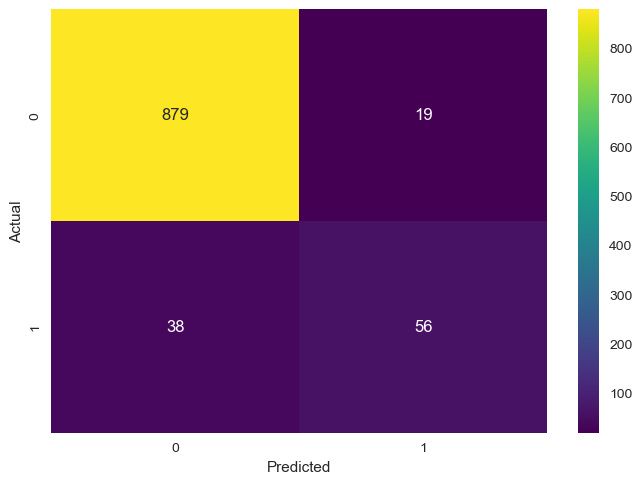

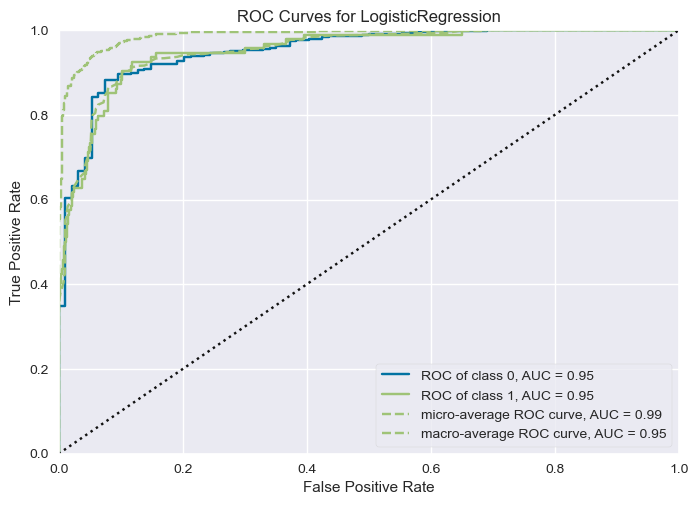

In [234]:
results = []

X = df_parted.drop(columns = ['Personal Loan'])
y = df_parted['Personal Loan']

scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_x, columns=list(X.columns))

x_train2, x_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

solver_penalties = [
    ('lbfgs', ['l2', None]),
    ('liblinear', ['l1', 'l2']),
    ('newton-cg', ['l2', None]),
    ('sag', ['l2', None]),
    ('saga', ['elasticnet', 'l1', 'l2', None])
]

for solver, penalties in solver_penalties:
    for C in np.arange(1,11):
        
        for penalty in penalties:
            if penalty == 'elasticnet':
                l1_ratio = 0.5
                clf = LogisticRegression(solver=solver, C=C, random_state=0,
                                         penalty=penalty, l1_ratio=l1_ratio, max_iter=10000)
            elif penalty is None:
                clf = LogisticRegression(solver=solver, random_state=0, max_iter=10000, penalty= None, C=C)
            else:
                clf = LogisticRegression(solver=solver, C=C, random_state=0, penalty=penalty, max_iter=10000)
            clf.fit(x_train2, y_train2)
            y_pred2 = clf.predict(x_test2)
            cm = metrics.confusion_matrix(y_test2, y_pred2)
            accuracy = metrics.accuracy_score(y_test2, y_pred2)
            precision = metrics.precision_score(y_test2, y_pred2)
            recall = metrics.recall_score(y_test2, y_pred2)
            results.append((solver, penalty, C, accuracy, precision, recall, cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]))


results_df = pd.DataFrame(results, columns=['Solver', 'penalty', 'C', 'Accuracy', 'Precision', 'Recall', 'True Negatives',
                                            'False Positives', 'False Negatives', 'True Positives'])

results_df.sort_values(by = 'Accuracy', ascending=False, inplace =True)
results_df.reset_index(drop = True, inplace =True)
display(results_df)

print(f'\n the best result is for {results_df["Solver"][0]} Solver , penalty : {results_df["penalty"][0]} and C : {results_df["C"][0]} which has accuracy of :', results_df['Accuracy'][0])
print('\n')

sns.heatmap([[results_df['True Negatives'][0], results_df['False Positives'][0]],
             [results_df['False Negatives'][0], results_df['True Positives'][0]]], annot=True, fmt='d', cmap='viridis')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

best_solver = results_df["Solver"][0]
best_clf = LogisticRegression(solver=best_solver, max_iter=1000, C=10, random_state=0)
best_clf.fit(x_train2, y_train2)
y_pred_best = best_clf.predict(x_test2)

visualizer = ROCAUC(best_clf)
visualizer.fit(x_train2, y_train2)
visualizer.score(x_test2, y_test2)
visualizer.show();

In [236]:
### naive bayes

Model  Accuracy  Precision    Recall  True Negatives  \
0  MultinomialNB()  0.909274   1.000000  0.042553             898   
1    BernoulliNB()  0.909274   0.562500  0.191489             884   
2     GaussianNB()  0.873992   0.385185  0.553191             815   
3   ComplementNB()  0.859879   0.375691  0.723404             785   

   False Positives  False Negatives  True Positives  
0                0               90               4  
1               14               76              18  
2               83               42              52  
3              113               26              68

the best result is for MultinomialNB() Model which has accuracy of : 0.9092741935483871


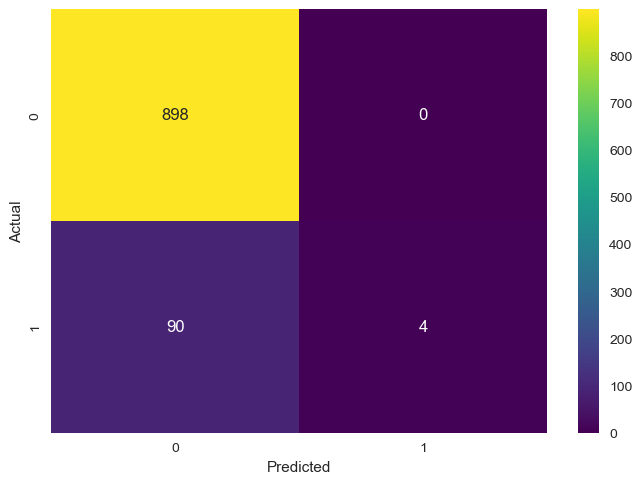

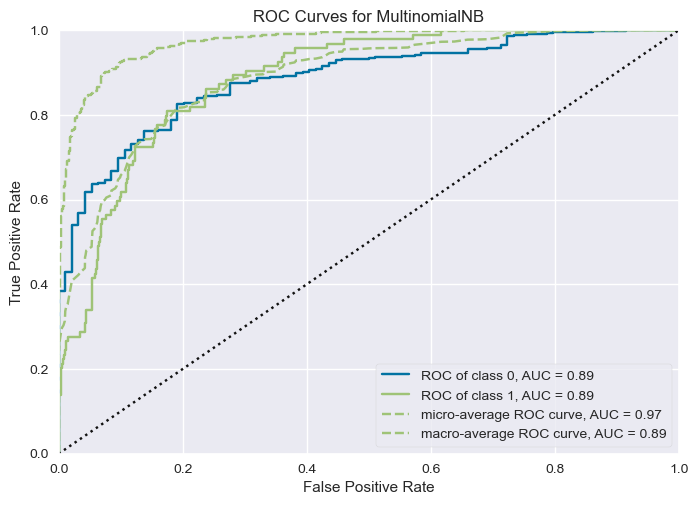

In [238]:
list_of_models = [GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB()]

results = []

X = df_final.drop(columns = ['Personal Loan'])
y = df_final['Personal Loan']

Scaler = MinMaxScaler(feature_range = (0, 1))
norm_x = Scaler.fit_transform(X)
X_norm = pd.DataFrame(norm_x, columns=list(X.columns))

x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 0)

for model in list_of_models:
    clf = model
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    results.append((model, accuracy, precision, recall, cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]))

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'True Negatives',
                                            'False Positives', 'False Negatives', 'True Positives'])

results_df.sort_values(by = 'Accuracy', ascending=False, inplace =True)
results_df.reset_index(drop = True, inplace =True)
display(results_df)

print(f'the best result is for {results_df["Model"][0]} Model which has accuracy of :', results_df['Accuracy'][0])

sns.heatmap([[results_df['True Negatives'][0], results_df['False Positives'][0]],
             [results_df['False Negatives'][0], results_df['True Positives'][0]]], annot=True, fmt='d', cmap='viridis')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

best_solver = results_df["Model"][0]
best_clf = best_solver
best_clf.fit(x_train, y_train)
y_pred_best = best_clf.predict(x_test)

visualizer = ROCAUC(best_clf)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

In [ ]:
### naive bayes on a parted database

Model  Accuracy  Precision    Recall  True Negatives  \
0  MultinomialNB()  0.914315   0.846154  0.117021             896   
1    BernoulliNB()  0.913306   0.583333  0.297872             878   
2     GaussianNB()  0.877016   0.402778  0.617021             812   
3   ComplementNB()  0.834677   0.339450  0.787234             754   

   False Positives  False Negatives  True Positives  
0                2               83              11  
1               20               66              28  
2               86               36              58  
3              144               20              74

the best result is for MultinomialNB() Model which has accuracy of : 0.9143145161290323


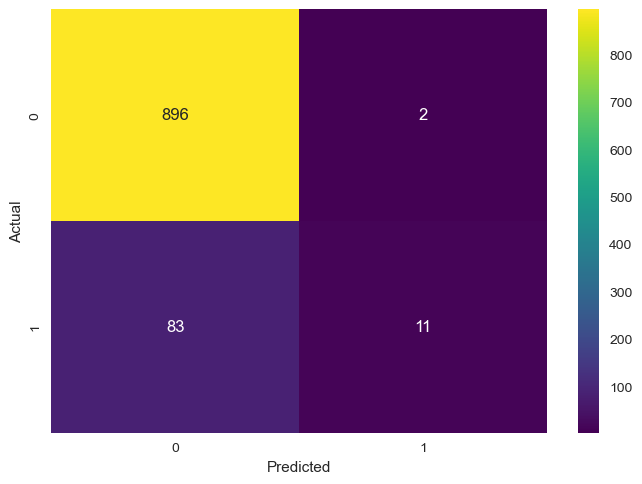

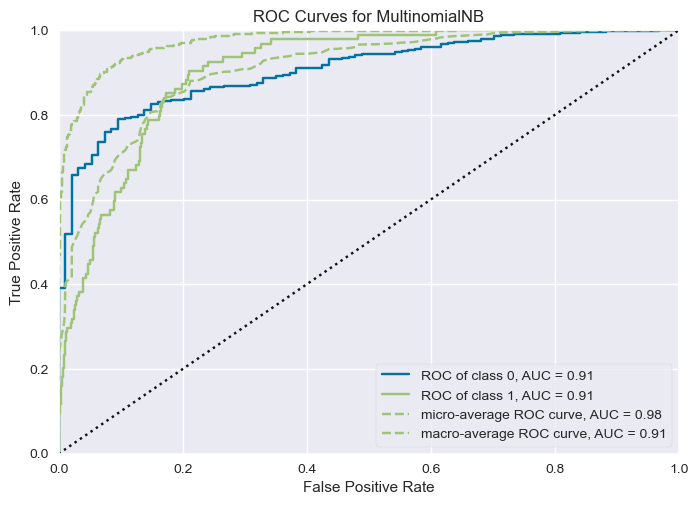

In [240]:
list_of_models = [GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB()]

results = []

X = df_parted.drop(columns = ['Personal Loan'])
y = df_parted['Personal Loan']

Scaler = MinMaxScaler(feature_range = (0, 1))
norm_x = Scaler.fit_transform(X)
X_norm = pd.DataFrame(norm_x, columns=list(X.columns))

x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 0)

for model in list_of_models:
    clf = model
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    results.append((model, accuracy, precision, recall, cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]))

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'True Negatives',
                                            'False Positives', 'False Negatives', 'True Positives'])

results_df.sort_values(by = 'Accuracy', ascending=False, inplace =True)
results_df.reset_index(drop = True, inplace =True)
display(results_df)

print(f'the best result is for {results_df["Model"][0]} Model which has accuracy of :', results_df['Accuracy'][0])

sns.heatmap([[results_df['True Negatives'][0], results_df['False Positives'][0]],
             [results_df['False Negatives'][0], results_df['True Positives'][0]]], annot=True, fmt='d', cmap='viridis')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

best_solver = results_df["Model"][0]
best_clf = best_solver
best_clf.fit(x_train, y_train)
y_pred_best = best_clf.predict(x_test)

visualizer = ROCAUC(best_clf)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show();

In [ ]:
### predict unseen data

In [306]:
location_data_test = pd.DataFrame(nomi.query_postal_code('92037'))
location_data_test

0
postal_code          92037
country_code            US
place_name        La Jolla
state_name      California
state_code              CA
county_name      San Diego
county_code           73.0
community_name         NaN
community_code         NaN
latitude           32.8455
longitude        -117.2521
accuracy               4.0

In [320]:
test_data = pd.DataFrame({
    'Age': [42],
    'Experience': [16],
    'Income': [30/12],
    'ZIP Code': [92037],
    'Family': [3],
    'CCAvg': [1.2],
    'Education': [3],
    'Mortgage': [0],
    'Personal Loan' : [1],
    'Securities Account': [1],
    'CD Account': [0],
    'Online': [1],
    'CreditCard': [1],
    'CreditCard': [1],
    'postal_code' : [92037],
    'place_name' : ['La Jolla'],
    'county_name' : ['San Diego'],
    'county_code' : [73.0],
    'latitude': [32.8455],
    'longitude': [-117.2521]
})

df_test = pd.concat([df_raw, test_data], ignore_index=True)
display(df_test.tail())

df_test['place_name'] = label_encoder.fit_transform(df_test['place_name'])
df_test['county_name'] = label_encoder.fit_transform(df_test['county_name'])

Age  Experience    Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
4955   30           4  0.104167     92037       4    0.4          1        85   
4956   63          39  0.166667     93023       2    0.3          3         0   
4957   65          40  0.340278     90034       3    0.5          2         0   
4958   28           4  0.576389     92612       3    0.8          1         0   
4959   42          16  2.500000     92037       3    1.2          3         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
4955              0                   0           0       1           0   
4956              0                   0           0       0           0   
4957              0                   0           0       1           0   
4958              0                   0           0       1           1   
4959              1                   1           0       1           1   

     postal_code   place_name  county_name  county_code  latitude  longitude  
4955       92037     La Jolla    San Diego         73.0   32.8455  -117.2521  
4956       93023         Ojai      Ventura        111.0   34.4451  -119.2565  
4957       90034  Los Angeles  Los Angeles         37.0   34.0290  -118.4005  
4958       92612       Irvine       Orange         59.0   33.6607  -117.8264  
4959       92037     La Jolla    San Diego         73.0   32.8455  -117.2521

In [312]:
rows_with_nan = df_test[df_test.isnull().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard, postal_code, place_name, county_name, county_code, latitude, longitude]
Index: []


In [322]:
df_test_parted = df_test.copy()

df_test_parted['Age'] = Four_part(df_test_parted['Age'])
df_test_parted['Experience'] = Four_part(df_test_parted['Experience'])
df_test_parted['Income'] = Four_part(df_test_parted['Income'])
df_test_parted['CCAvg'] = Four_part(df_test_parted['CCAvg'])
df_test_parted['Mortgage'] = Four_part(df_test_parted['Mortgage'])

df_test_parted['ZIP Code'] = label_encoder.fit_transform(df_test_parted['ZIP Code'])
df_test_parted['place_name'] = label_encoder.fit_transform(df_test_parted['place_name'])
df_test_parted['county_name'] = label_encoder.fit_transform(df_test_parted['county_name'])

df_test_parted.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0    1           1       1        82       4      1          1         1   
1    2           2       1        33       3      1          1         1   
2    2           2       1       363       1      1          1         1   
3    2           1       2       294       1      2          2         1   
4    2           1       1        95       4      1          2         1   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

  postal_code  place_name  county_name  county_code  latitude  longitude  
0       91107         147           10         37.0   34.1510  -118.0889  
1       90089         106           10         37.0   33.7866  -118.2987  
2       94720          17            0          1.0   37.8738  -122.2549  
3       94112         178            2         75.0   37.7195  -122.4411  
4       91330         134           10         37.0   34.2283  -118.5368

In [284]:
df_test.dropna(inplace = True)
rows_with_nan = df_test[df_test.isnull().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard, postal_code, place_name, county_name, county_code, latitude, longitude]
Index: []


In [334]:
X = df_test.drop(columns = ['Personal Loan'])
y = df_test['Personal Loan']

X_parted = df_test_parted.drop(columns = ['Personal Loan'])
y_parted = df_test_parted['Personal Loan']

scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)
X_scaled1 = pd.DataFrame(scaled_x, columns=list(X.columns))

Scaler = MinMaxScaler(feature_range = (0, 1))
norm_x = Scaler.fit_transform(X_parted)
X_scaled2 = pd.DataFrame(norm_x, columns=list(X.columns))

clf = LogisticRegression(solver='saga', random_state=0, penalty=None, max_iter=10000)
clf.fit(X_scaled1[:4959], y[:4959])
y_pred = clf.predict(X_scaled1[4959:])
print('prediction result of test data for Logistic Regression with saga solver and None penalty is : ', y_pred[0])

clf = BernoulliNB()
clf.fit(X_scaled2[:4959], y_parted[:4959])
y_pred2 = clf.predict(X_scaled2[4959:])
print('prediction result of test data for Bernoulli Naive Bayes is : ', y_pred2[0])

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_scaled2[:4959], y_parted[:4959])
y_pred3 = clf.predict(X_scaled2[4959:])
print('prediction result of test data for KNN with 3 neighbors is : ', y_pred3[0])

prediction result of test data for Logistic Regression with saga solver and None penalty is :  1
prediction result of test data for Bernoulli Naive Bayes is :  0
prediction result of test data for KNN with 3 neighbors is :  0
